# 1.0 - ENTENDENDO DO NEGÓCIO DA EMPRESA

A empresa All in One é um outlet de roupas multimarcas que comercializa produtos de segunda linha a preços reduzidos através de um e-commerce. Seu modelo de negócio é baseado na venda online de produtos fora de linha de várias marcas, oferecendo itens de marcas conhecidas a preços acessíveis para consumidores que buscam qualidade com custo-benefício. As principais métricas e KPIs do negócio incluem receita total, monitorada por relatórios financeiros, margem de lucro bruta, analisada por custos e preços de venda, taxa de conversão, acompanhada por ferramentas de análise web, ticket médio, registrado em relatórios de vendas, frequência de compra, analisada pelo comportamento dos clientes, valor do tempo de vida do cliente (CLV), previsto por modelos baseados em dados históricos, taxa de retenção de clientes, observada pela análise de clientes ativos e inativos, taxa de aquisição de novos clientes, monitorada por campanhas de marketing e registros no site, e custo de aquisição de novos clientes (CAC), analisado por relatórios financeiros e de marketing. As estratégias para aumentar o faturamento incluem a melhoria da experiência do usuário com otimização do site e atendimento eficiente, implementação do programa de fidelidade “Insiders” para incentivar compras repetidas, campanhas de marketing digital, expansão de produtos e marcas através de parcerias estratégicas, utilização de análises avançadas para entender padrões de compra e segmentação de clientes para campanhas personalizadas, além de promoções e ofertas sazonais planejadas em datas comemorativas e períodos de menor movimento.

# 2.0 - ENTENDENDO O PROBLEMA DE NEGÓCIO

A All in One é um outlet multimarcas que vende produtos de segunda linha a preços reduzidos por e-commerce. O time de marketing identificou que alguns clientes compram produtos mais caros com frequência, contribuindo significativamente para o faturamento. Assim, desejam lançar o programa de fidelidade "Insiders" para recompensar esses clientes. A causa raiz é a necessidade de segmentar a base de clientes para identificar os de maior valor. O time de marketing é o responsável pelo programa. A solução envolve análise de dados e machine learning, incluindo análise RFM e clusterização, com um dashboard interativo para monitoramento. O problema envolve estratégias de marketing baseadas em previsão de comportamento, utilizando métodos de análise estatística, machine learning e mineração de dados. O resultado será entregue em um relatório executivo com um dashboard interativo.

# 3.0 - COLETANDO E IMPORTANDO OS DADOS

## 3.1 - IMPORTAÇÃO DE BIBLIOTECAS

In [141]:
import numpy   as np
import pandas  as pd
import seaborn as sns
import re

import umap.umap_ as umap
import scipy.stats as st

from IPython.display import Image
from IPython.display import HTML
from matplotlib import pyplot as plt

from sklearn import cluster       as c
from sklearn import metrics       as m
from sklearn import preprocessing as pp
from sklearn import decomposition as dd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.manifold import TSNE
from sklearn import mixture as mx
from scipy.cluster import hierarchy as hc
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from matplotlib.cm import get_cmap
from sklearn.metrics import silhouette_samples, silhouette_score

from pandas_profiling import ProfileReport
from plotly import express as px
from datetime import datetime
from tabulate import tabulate

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 3.2 - Funções Auxiliadoras

In [2]:
def jupyter_settings():
    %matplotlib inline
    
    plt.style.use( 'ggplot')
    plt.rcParams['figure.figsize'] = [24, 9]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()
    
jupyter_settings()

## 3.3 - CARREGANDO DADOS

In [3]:
# Carregando o arquivo CSV usando caminho relativo
df = pd.read_csv('dataset/data.csv', encoding='latin1')

# 4.0 - ANÁLISE DESCRITIVA - DESCREVENDO OS DADOS

In [4]:
# Criando uma cópia do DataFrame para a boa prática
df1 = df.copy()

In [5]:
# Verificando as primeiras linhas do DataFrame
df1.head(5) 

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## 4.1 - Renomeando as Colunas

In [6]:
# Renomenando colunas para facilitar a manipulação
df1.rename(columns={'InvoiceNo': 'invoice_number', 'StockCode': 'stock_code', 
                     'Description': 'product_description', 'Quantity': 'quantity',
                     'InvoiceDate': 'invoice_date', 'UnitPrice': 'unit_price', 
                     'CustomerID': 'customer_id', 'Country': 'country'}, inplace=True)

df1.columns

Index(['invoice_number', 'stock_code', 'product_description', 'quantity',
       'invoice_date', 'unit_price', 'customer_id', 'country'],
      dtype='object')

## 4.2 - Dimensão dos dados

In [7]:
# mostrando a quantidade de linhas e colunas do dataframe
print(f'O dataset contém {df1.shape[0]} linhas e {df1.shape[1]} colunas.')

O dataset contém 541909 linhas e 8 colunas.


## 4.3 - Tipo de dados

In [8]:
# checando os tipos de dados de cada coluna
df1.dtypes

invoice_number          object
stock_code              object
product_description     object
quantity                 int64
invoice_date            object
unit_price             float64
customer_id            float64
country                 object
dtype: object

### 4.3.1 - Modificando os tipos de dados

In [9]:
# Modificando o tipo de dado da coluna 'customer_id'
df1['customer_id'] = df1['customer_id'].astype(float).astype('Int64')

# Modificando o tipo de dado da coluna 'unit_price'
df1['unit_price'] = df1['unit_price'].astype(float)

In [10]:
# Remover a hora, mantendo apenas a data
df1['invoice_date'] = df1['invoice_date'].str.split().str[0]

# Converter para datetime
df1['invoice_date'] = pd.to_datetime(df1['invoice_date'], format='%m/%d/%Y')

In [11]:
# Remover a letras dos valores na coluna 'invoice_number'
df1['invoice_number'] = df1['invoice_number'].str.replace(r'\D', '', regex=True)

# Substituindo valores em branco por NaN na coluna 'invoice_number'
df1['invoice_number'] = df1['invoice_number'].replace('', np.nan)

# Converter a coluna 'invoice_number' para float e depois para Int64
df1['invoice_number'] = df1['invoice_number'].astype(float).astype('Int64')

In [12]:
# Remover a letras dos valores na coluna 'stock_code'
df1['stock_code'] = df1['stock_code'].str.replace(r'\D', '', regex=True)

# Substituindo valores em branco por NaN na coluna 'stock_code'
df1['stock_code'] = df1['stock_code'].replace('', np.nan)

# Converter a coluna 'stock_code' para float e depois para Int64
df1['stock_code'] = df1['stock_code'].astype(float).astype('Int64')

In [13]:
# checando se os tipos de dados de cada coluna foram corretamente modificados
df1.dtypes

invoice_number                  Int64
stock_code                      Int64
product_description            object
quantity                        int64
invoice_date           datetime64[ns]
unit_price                    float64
customer_id                     Int64
country                        object
dtype: object

In [14]:
df1.head(2)

,invoice_number,stock_code,product_description,quantity,invoice_date,unit_price,customer_id,country
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom


## 4.4 - Checando NAs

In [15]:
df1.isna().sum()

invoice_number              0
stock_code               2796
product_description      1454
quantity                    0
invoice_date                0
unit_price                  0
customer_id            135080
country                     0
dtype: int64

In [16]:
# verificando a existência de valores ausentes e a proporção de dados faltantes
missing_values = df1.isnull().sum()
missing_percentage = (missing_values / df.shape[0]) * 100
missing_df = pd.DataFrame({'Total de Valores Faltantes': missing_values, 'Porcentagem': missing_percentage})
missing_df

,Total de Valores Faltantes,Porcentagem
invoice_number,0,0.000000
stock_code,2796,0.515954
product_description,1454,0.268311
quantity,0,0.000000
invoice_date,0,0.000000
unit_price,0,0.000000
customer_id,135080,24.926694
country,0,0.000000


### 4.1.1 - Tratando os NAs de acordo com o negócio
1. Recuperar o customer_id pela invoice_number - criando novos ids para aquelas compras.

In [17]:
df_missing = df1.loc[df1['customer_id'].isna(), :]
df_not_missing = df1.loc[~df1['customer_id'].isna(), :]

In [18]:
# Criando um DataFrame de Referência para as linhas com customer_id em branco
df_backup = pd.DataFrame( df_missing['invoice_number'].drop_duplicates() )
df_backup['customer_id'] = np.arange( 19000, 19000+len( df_backup ), 1)

# merge original with reference dataframe
df1 = pd.merge( df1, df_backup, on='invoice_number', how='left' )

# coalesce 
df1['customer_id'] = df1['customer_id_x'].combine_first( df1['customer_id_y'] )

# drop extra columns
df1 = df1.drop( columns=['customer_id_x', 'customer_id_y'], axis=1 )

In [19]:
# Checando se os valores ausentes da custimer_id foram tratados
df1.isna().sum()

invoice_number            0
stock_code             2796
product_description    1454
quantity                  0
invoice_date              0
unit_price                0
country                   0
customer_id               0
dtype: int64

In [20]:
# Removendo os NAs da coluna 'product_description' 
# Como a representatividade dos dados é muito pequena. Em um primeiro momento, optamos por remover os valores ausentes
df1 = df1.dropna(subset=['product_description'])

In [21]:
# Checando se os valores ausentes da product_description foram tratados
df1.isna().sum()

invoice_number            0
stock_code             2791
product_description       0
quantity                  0
invoice_date              0
unit_price                0
country                   0
customer_id               0
dtype: int64

In [22]:
# Removendo os NAs da coluna 'stock_code' 
# Como a representatividade dos dados é muito pequena. Em um primeiro momento, ptamos por remover os valores ausentes
df1 = df1.dropna(subset=['stock_code'])

In [23]:
# Checando se os valores ausentes da stcok_code foram tratados
df1.isna().sum()

invoice_number         0
stock_code             0
product_description    0
quantity               0
invoice_date           0
unit_price             0
country                0
customer_id            0
dtype: int64

## 4.5 - Estatística Descritiva

In [24]:
# Estátistica Descritiva
num_attributes = df1.select_dtypes(include=['int64', 'float64', 'Int64'])

cat_attributes = df1.select_dtypes(exclude=['int64', 'float64', 'Int64'])

### 4.5.1 - Atributos numéricos

In [25]:
# Central Tendency - mean, meadina 
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T 
d2 = pd.DataFrame( num_attributes.apply( min ) ).T 
d3 = pd.DataFrame( num_attributes.apply( max ) ).T 
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T 
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T 
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,invoice_number,536365.0,581587.0,45222.0,559968.696290,560692.00,13427.659257,-0.109180,-1.249856
1,stock_code,2.0,90214.0,90212.0,31473.013004,22639.00,21456.154031,1.982245,2.095168
2,quantity,-80995.0,80995.0,161990.0,9.642444,3.00,218.534077,-0.281853,119715.584277
3,unit_price,0.0,649.5,649.5,3.291017,2.08,4.563428,24.957410,2075.204339
4,customer_id,12346.0,22709.0,10363.0,16680.644354,16242.00,2902.615876,0.496480,-0.786344


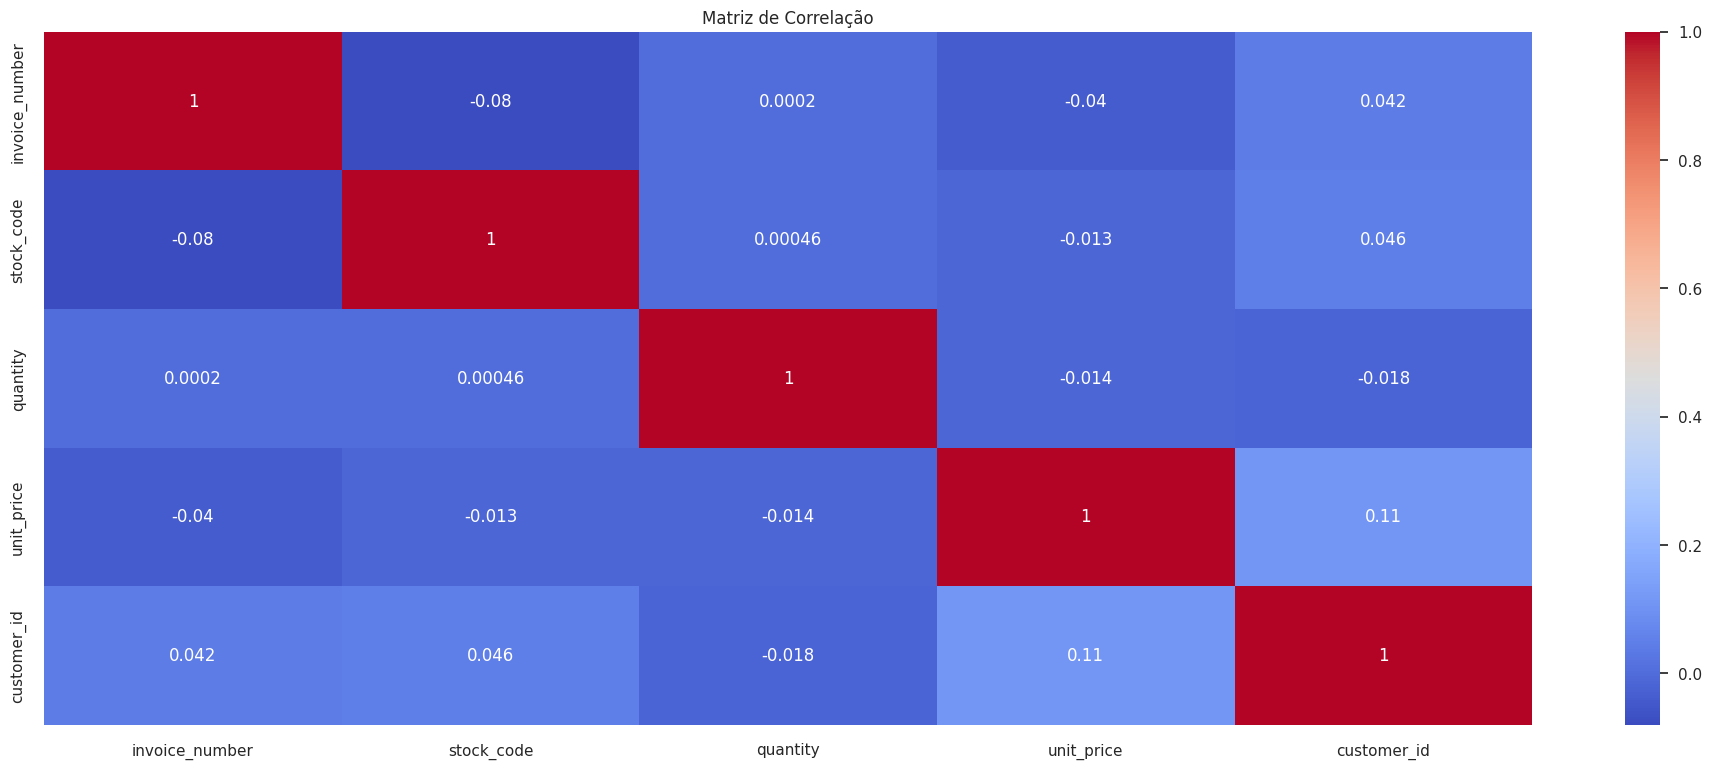

In [26]:
correlation_matrix = num_attributes.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

* Investigação dos atributos numéricos:
1. Quantidade negativa pode ser devolução. </br>
2. Preço unitário igual a zero, pode ser brinde ou promoção.

### 4.5.2 - Atributos Categóricos

In [27]:
# Apply the lambda function to count the number of unique values in each categorical attribute
cat_attributes.apply(lambda x: x.unique().shape[0])

product_description    4211
invoice_date            305
country                  38
dtype: int64

# 5.0 - LIMPEZA E FILTRAGEM DAS VARIÁVEIS

In [28]:
df2 = df1.copy()

In [29]:
df2.head()

,invoice_number,stock_code,product_description,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,United Kingdom,17850
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,United Kingdom,17850
2,536365,84406,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,United Kingdom,17850
3,536365,84029,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,United Kingdom,17850
4,536365,84029,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,United Kingdom,17850


## 5.1 - Verificando a consistência dos dados

In [30]:
# Valores Duplicados
duplicated_rows = df2.duplicated()
print(f"Linhas duplicadas: {duplicated_rows.sum()}")

Linhas duplicadas: 5332


In [31]:
# Como as linhas duplicadas representa 1% do dataset, decidimos remove-las
df2 = df2.drop_duplicates()

In [32]:
# Quantidade de valores negativos em quantity e unit_price
negative_quantity = (df2['quantity'] < 0).sum()
negative_unit_price = (df2['unit_price'] < 0.04).sum()

print(f"Valores negativos em 'quantity': {negative_quantity}")
print(f"Valores negativos em 'unit_price': {negative_unit_price}")

Valores negativos em 'quantity': 9143
Valores negativos em 'unit_price': 1048


## 5.2 - Preparação dos dados em relação ao problema de negócio

In [33]:
# Garantindo que unit_price não seja negativo e seja maior que 0.04 cents.
# Não queremos que brindes sejam levados em conta no agrupamento.
df2 = df2[df2['unit_price'] >= 0.04]

In [34]:
# Dividindo a coluna quantity em duas: retornos e vendas.
df2_returns = df2[df2['quantity'] < 0].copy()
df2_purchases = df2[df2['quantity'] >= 0].copy()

In [35]:
# Agrupar por país e contar consumidores únicos
unique_countries = df2.groupby('country')['customer_id'].nunique().reset_index().sort_values(by='customer_id', ascending=False)
unique_countries

,country,customer_id
36,United Kingdom,5291
14,Germany,95
13,France,90
10,EIRE,39
31,Spain,30
3,Belgium,25
33,Switzerland,24
27,Portugal,20
19,Italy,14
12,Finland,12


In [36]:
# Tirando do dataset a coluna da descrição dos itens, pois não é relevante na resolução do problema de negócios
df2 = df2.drop(columns='product_description', axis=1)

In [37]:
# Retirar os países que possuem União Europeia e Não especificados
df2 = df2[~df2['country'].isin(['Eropean Community', 'Unspecified'])]

In [38]:
# Removendo o outlier encontrado na EDA do ciclo anterior
df2 = df2[~df2['customer_id'].isin([16446])]

# 6.0 - ENGENHARIA DE RECURSOS

In [39]:
df3 = df2.copy()

In [40]:
df3.head()

,invoice_number,stock_code,quantity,invoice_date,unit_price,country,customer_id
0,536365,85123,6,2010-12-01,2.55,United Kingdom,17850
1,536365,71053,6,2010-12-01,3.39,United Kingdom,17850
2,536365,84406,8,2010-12-01,2.75,United Kingdom,17850
3,536365,84029,6,2010-12-01,3.39,United Kingdom,17850
4,536365,84029,6,2010-12-01,3.39,United Kingdom,17850


In [41]:
# Dropando as colunas desnecessárias para a Engenharia de Recursos
# Deixando apenas o customer_id
df3_ref = df3.drop(['invoice_number', 'stock_code', 'quantity', 'unit_price', 'country', 'invoice_date'], axis=1).drop_duplicates(ignore_index=True)

In [42]:
df3_ref.shape

(5762, 1)

## 6.1 - Criando novas variáveis

In [43]:
# 6.1.1 - Gross Revenue / Faturamento
df2_purchases['gross_revenue'] = df2_purchases['quantity'] * df2_purchases['unit_price']

# Monetary
df3_monetary = df2_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').sum().reset_index()
df3_ref = pd.merge(df3_ref, df3_monetary, on='customer_id', how='left')
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
dtype: int64

In [44]:
# 6.1.2 - Recency - Dias desde a última compra
df_recency = df2_purchases.groupby('customer_id')['invoice_date'].max().reset_index()
df_recency['recency_days'] = (df2_purchases['invoice_date'].max() - df_recency['invoice_date']).dt.days
df_recency = df_recency[['customer_id', 'recency_days']].copy()
df3_ref = pd.merge(df3_ref, df_recency, on='customer_id', how='left')
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
dtype: int64

In [45]:
# 6.1.3 - Quantidade de pedidos por consumidor
df_freq = (df2_purchases.loc[:, ['customer_id', 'invoice_number']].drop_duplicates()
                                                             .groupby( 'customer_id' )
                                                             .count()
                                                             .reset_index()
                                                             .rename( columns={'invoice_number': 'qtde_invoices'}) )
df3_ref = pd.merge( df3_ref, df_freq, on='customer_id', how='left' )
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
dtype: int64

In [46]:
# 6.1.4 - Quantidade de itens comprados por consumidor
df_freq = (df2_purchases.loc[:, ['customer_id', 'quantity']].groupby( 'customer_id' ).sum()
                                                           .reset_index()
                                                           .rename( columns={'quantity': 'qtde_items'} ) )
df3_ref = pd.merge( df3_ref, df_freq, on='customer_id', how='left' )
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
qtde_items       67
dtype: int64

In [47]:
# 6.1.5 - Ticket Médio
df_avg_ticket = df2_purchases[['customer_id', 'gross_revenue']].groupby('customer_id').mean().reset_index().rename(columns={'gross_revenue': 'avg_ticket'})
df3_ref = pd.merge(df3_ref, df_avg_ticket, on='customer_id', how='left')
df3_ref.isna().sum()

customer_id       0
gross_revenue    67
recency_days     67
qtde_invoices    67
qtde_items       67
avg_ticket       67
dtype: int64

In [48]:
# 6.1.6 - Media de compras por dias
# Ordenar de forma crescente para garantir que a data mais antiga vem primeiro
df_aux = df3[['customer_id', 'invoice_date']].drop_duplicates().sort_values(['customer_id', 'invoice_date'], ascending=[True, True]) # type: ignore

# Criar colunas para o próximo cliente e a data anterior
df_aux['next_customer_id'] = df_aux['customer_id'].shift(-1)  # Próximo cliente
df_aux['previous_date'] = df_aux['invoice_date'].shift(-1)  # Data da próxima fatura

# Calcular a recência
df_aux['avg_recency_days'] = df_aux.apply(
    lambda x: (x['previous_date'] - x['invoice_date']).days if pd.notnull(x['next_customer_id']) and x['customer_id'] == x['next_customer_id'] else np.nan,
    axis=1
)

# Limpar colunas desnecessárias e remover valores NaN
df_aux = df_aux.drop(['invoice_date', 'next_customer_id', 'previous_date'], axis=1).dropna()

# Calcular a média de recência por cliente
df_avg_recency_days = df_aux.groupby('customer_id').mean().reset_index()

# Mesclar com o DataFrame original
df3_ref = pd.merge(df3_ref, df_avg_recency_days, on='customer_id', how='left')
df3_ref.isna().sum()


customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
dtype: int64

In [49]:
# 6.1.7 - Frequencia de compras por dias
df_aux = ( df2_purchases[['customer_id', 'invoice_number', 'invoice_date']].drop_duplicates()
                                                             .groupby( 'customer_id')
                                                             .agg( max_ = ( 'invoice_date', 'max' ), 
                                                                   min_ = ( 'invoice_date', 'min' ),
                                                                   days_= ( 'invoice_date', lambda x: ( ( x.max() - x.min() ).days ) + 1 ),
                                                                   buy_ = ( 'invoice_number', 'count' ) ) ).reset_index()
# Frequency
df_aux['frequency'] = df_aux[['buy_', 'days_']].apply( lambda x: x['buy_'] / x['days_'] if  x['days_'] != 0 else 0, axis=1 )

# Merge
df3_ref = pd.merge( df3_ref, df_aux[['customer_id', 'frequency']], on='customer_id', how='left' )

df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
dtype: int64

In [50]:
# 6.1.8 - Quantidade de produtos únicos por clientes
df_freq = (df2_purchases.loc[:, ['customer_id', 'stock_code']].groupby( 'customer_id' ).count()
                                                           .reset_index()
                                                           .rename( columns={'stock_code': 'qtde_products'} ) )
df3_ref = pd.merge( df3_ref, df_freq, on='customer_id', how='left' )
df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
qtde_products         67
dtype: int64

In [51]:
# 6.1.9 - Número de retornos por clientes
df_returns = df2_returns[['customer_id', 'quantity']].groupby( 'customer_id' ).sum().reset_index().rename( columns={'quantity':'qtde_returns'} )
df_returns['qtde_returns'] = df_returns['qtde_returns'] * -1

df3_ref = pd.merge( df3_ref, df_returns, how='left', on='customer_id' )
df3_ref.loc[df3_ref['qtde_returns'].isna(), 'qtde_returns'] = 0

df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
qtde_products         67
qtde_returns           0
dtype: int64

In [52]:
# 6.1.10 - Quantidades de itens por cesta
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_number', 'quantity']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_number', 'nunique'),
                                                                                  n_products=( 'quantity', 'sum' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df3_ref = pd.merge( df3_ref, df_aux[['customer_id', 'avg_basket_size']], how='left', on='customer_id' )
df3_ref.isna().sum()

customer_id            0
gross_revenue         67
recency_days          67
qtde_invoices         67
qtde_items            67
avg_ticket            67
avg_recency_days    2794
frequency             67
qtde_products         67
qtde_returns           0
avg_basket_size       67
dtype: int64

In [53]:
# 6.1.11 - Quantidade de produtos distintos por compra
df_aux = ( df2_purchases.loc[:, ['customer_id', 'invoice_number', 'stock_code']].groupby( 'customer_id' )
                                                                            .agg( n_purchase=( 'invoice_number', 'nunique'),
                                                                                   n_products=( 'stock_code', 'nunique' ) )
                                                                            .reset_index() )

# calculation
df_aux['avg_unique_basket_size'] = df_aux['n_products'] / df_aux['n_purchase']

# merge
df3_ref = pd.merge( df3_ref, df_aux[['customer_id', 'avg_unique_basket_size']], how='left', on='customer_id' )
df3_ref.isna().sum()

customer_id                  0
gross_revenue               67
recency_days                67
qtde_invoices               67
qtde_items                  67
avg_ticket                  67
avg_recency_days          2794
frequency                   67
qtde_products               67
qtde_returns                 0
avg_basket_size             67
avg_unique_basket_size      67
dtype: int64

In [54]:
df3_ref.head(5)

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,18.152222,35.500000,17.000000,297.0,37.0,50.970588,0.588235
1,13047,3232.59,56.0,9.0,1390.0,18.904035,27.250000,0.028302,171.0,35.0,154.444444,11.666667
2,12583,6705.38,2.0,15.0,5028.0,28.902500,23.187500,0.040323,232.0,50.0,335.200000,7.600000
3,13748,948.25,95.0,5.0,439.0,33.866071,92.666667,0.017921,28.0,0.0,87.800000,4.800000
4,15100,876.00,333.0,3.0,80.0,292.000000,8.600000,0.073171,3.0,22.0,26.666667,0.333333


In [55]:
df3_ref.shape

(5762, 12)

# 7.0 - ANÁLISE EXPLORATÓRIA DOS DADOS (EDA)

In [56]:
df4 = df3_ref.dropna()
df4.isna().sum()

customer_id               0
gross_revenue             0
recency_days              0
qtde_invoices             0
qtde_items                0
avg_ticket                0
avg_recency_days          0
frequency                 0
qtde_products             0
qtde_returns              0
avg_basket_size           0
avg_unique_basket_size    0
dtype: int64

In [57]:
len( df4['customer_id'].unique() )

2966

In [58]:
df4.shape

(2966, 12)

## 7.1 - Análise Univarida


In [59]:
# # Fazendo análise exploratória usando o profile do pandas.
# profile = ProfileReport(df4)
# profile.to_file("your_report.html")

In [60]:
df4[df4['customer_id'] == 14646].head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size
1014,14646,279138.02,1.0,72.0,196844.0,135.503893,7.844444,0.20339,2060.0,288.0,2733.944444,9.611111


In [61]:
df4[df4['qtde_items'] == 196844]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size
1014,14646,279138.02,1.0,72.0,196844.0,135.503893,7.844444,0.20339,2060.0,288.0,2733.944444,9.611111


In [62]:
#df4[df4['qtde_products'] == 7838]
df4[df4['customer_id'] == 17841].head()

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size
68,17841,40493.49,1.0,124.0,22814.0,5.282908,3.321429,0.33244,7665.0,203.0,183.983871,10.104839


In [63]:
#df4[df4['frequency'] == 17]
df4[df4['customer_id'] == 17850]

,customer_id,gross_revenue,recency_days,qtde_invoices,qtde_items,avg_ticket,avg_recency_days,frequency,qtde_products,qtde_returns,avg_basket_size,avg_unique_basket_size
0,17850,5391.21,372.0,34.0,1733.0,18.152222,35.5,17.0,297.0,37.0,50.970588,0.588235


* Notas da análise univariada:
  1. Gross_revenue -> OK
  2. Recency_days -> maior parte dos usuários tem recência baixa. OK
  3. qtde_invoice -> OK
  4. qtde_itens -> tem que investigar os 5 maiores valores. 
  5. qtde_produtos -> O histograma é típico de um ecommerce. Fica mais na cauda longa os clientes mais fiéis.
  6. avg_ticket -> Investigar o outlier, parece que a contribuição dela não é real. Retira-lo na parte de filtragem de variáveis.
  7. avg_recency_days -> OK
  8. frequency -> olhar o valor máximo, e analisar o usuário dele. 
  9. qtd_returns -> foi removido o outlier dela no avg_ticket. Analisar o segundo outlier. 
  10.  avg_basket_size -> analisar o usuário do valor máximo. foi retirado o outlier na avg_ticket.
  11. avg_unique_basket_size -> OK

## 7.2 - Análise Bivariada

In [64]:
cols = ['customer_id']
df42 = df4.drop( cols, axis=1 )

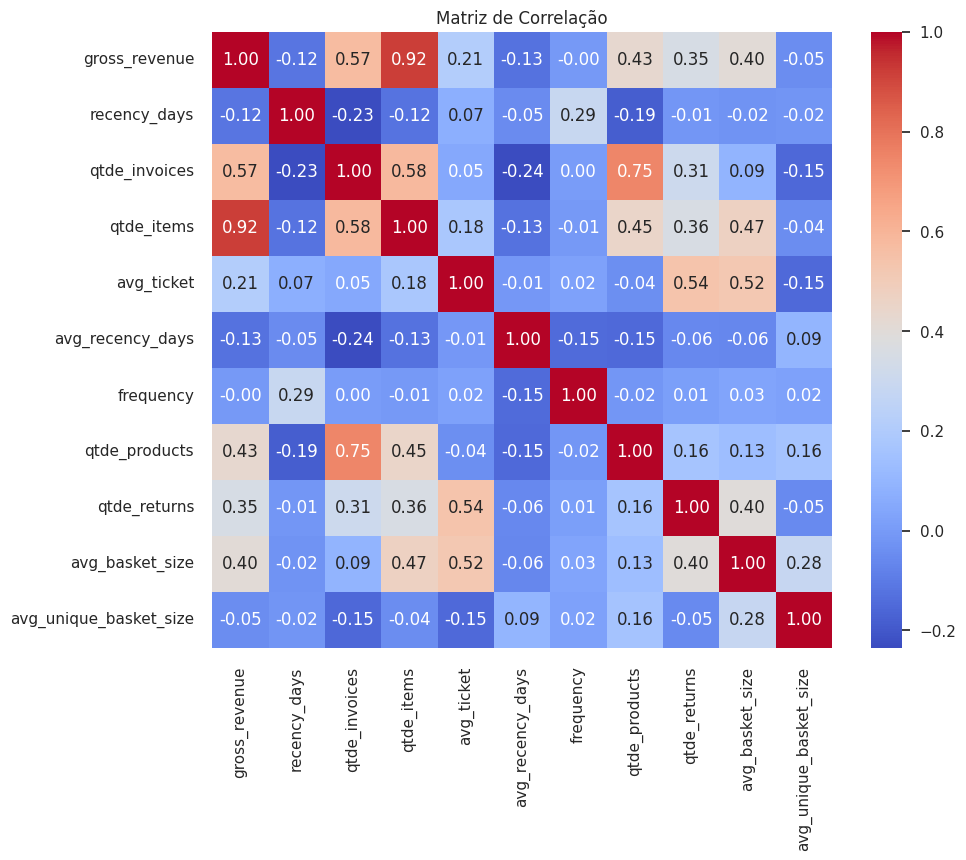

In [65]:
# Matriz de correlação
corr_matrix = df42.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlação')
plt.show()

<Figure size 2500x1200 with 0 Axes>

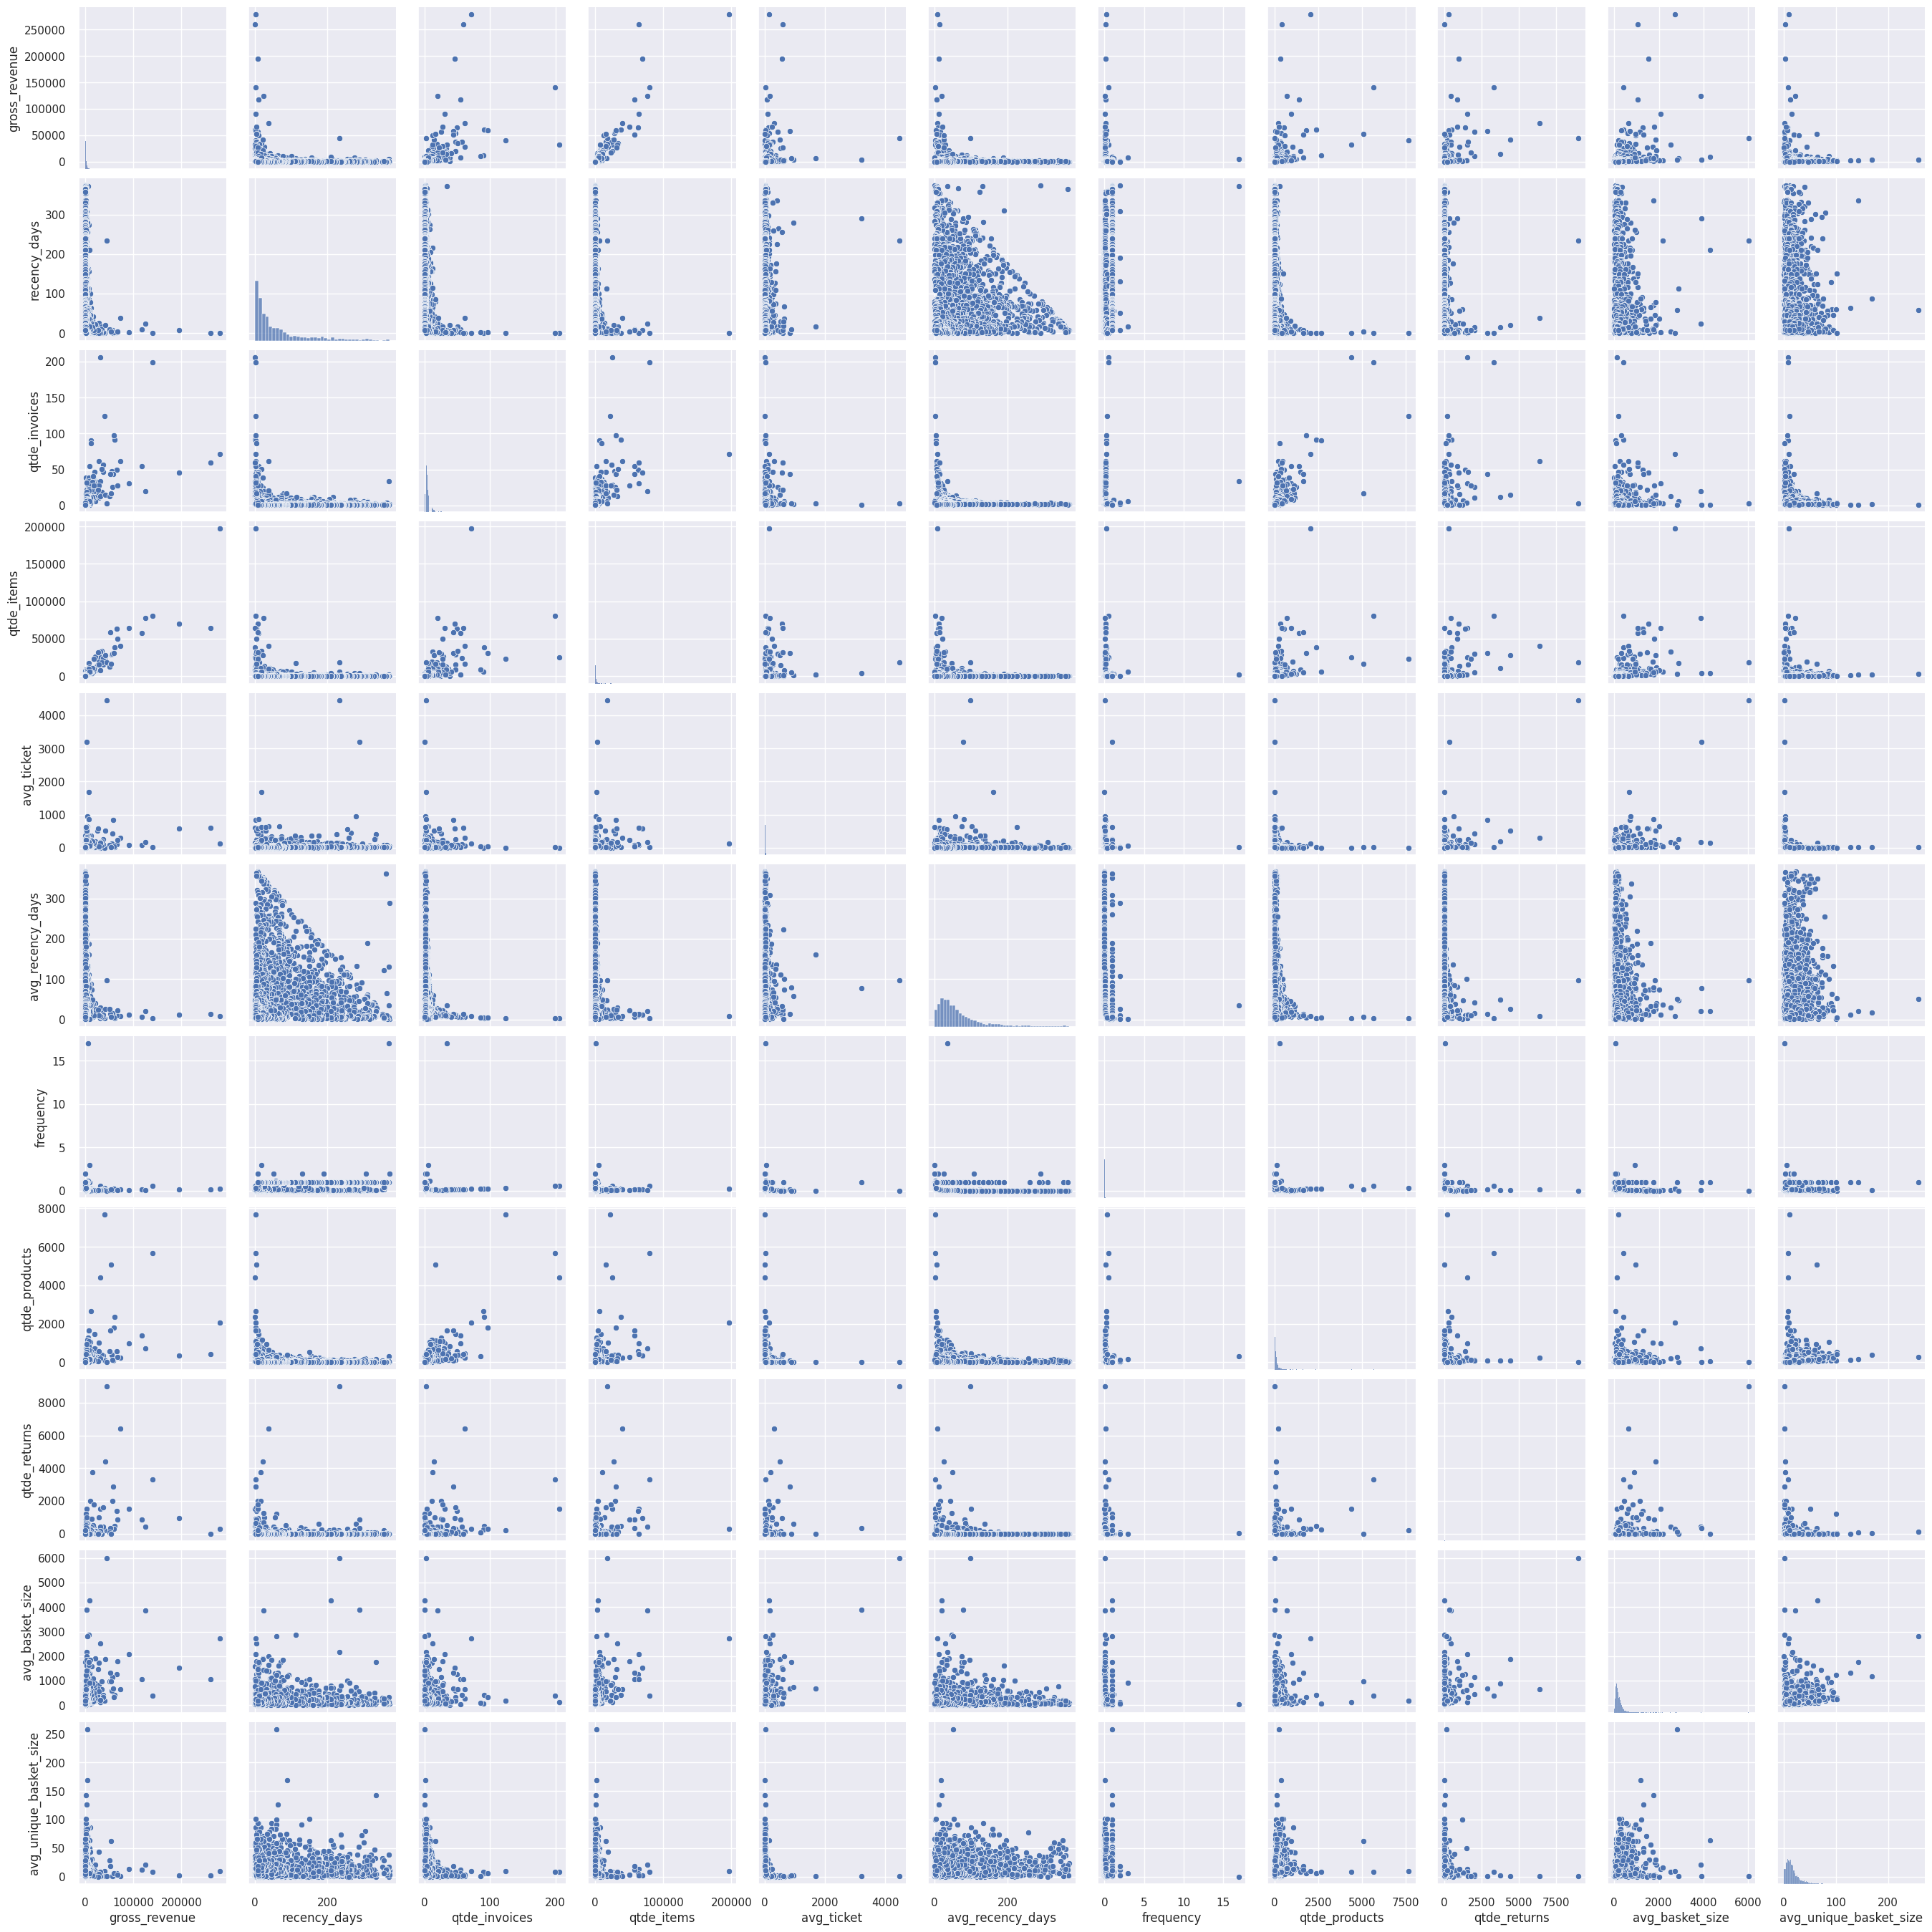

In [66]:
plt.figure( figsize=(25, 12) )
sns.pairplot( df42 )

* Notas da análise bivariada:
    1. Frequency possui baixa variância - feature candidata a ser retirada.
    2. Avg_ticket possui baixa variância - feature candidata a ser retirada.
    3. qtde_itens & qtde_products & qtd_invoices - alta correlação. Retirar duas

## 7.3 - Estudo do Espaço

In [67]:
# original dataset
#df20 = df4.drop( columns=['customer_id'], axis=1 ).copy()

# selected dataset
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']
df20 = df4[ cols_selected ].copy() 

In [68]:
## Standard Scalaer
ss = pp.MinMaxScaler()

df20['gross_revenue'] = ss.fit_transform( df20[['gross_revenue']] )
df20['recency_days'] = ss.fit_transform( df20[['recency_days']] )
# df20['qtde_invoices'] = ss.fit_transform( df20[['qtde_invoices']] )
# df20['qtde_items'] = ss.fit_transform( df20[['qtde_items']] )
df20['qtde_products'] = ss.fit_transform( df20[['qtde_products']] )
# df20['avg_ticket'] = ss.fit_transform( df20[['avg_ticket']] )
# df20['avg_recency_days'] = ss.fit_transform( df20[['avg_recency_days']] )
df20['frequency'] = ss.fit_transform( df20[['frequency']] )
df20['qtde_returns'] = ss.fit_transform( df20[['qtde_returns']] )
# df20['avg_basket_size'] = ss.fit_transform( df20[['avg_basket_size']] )
# df20['avg_unique_basket_size'] = ss.fit_transform( df20[['avg_unique_basket_size']] )

X = df20.copy()

In [69]:
X.shape

(2966, 6)

### 7.3.1 - PCA

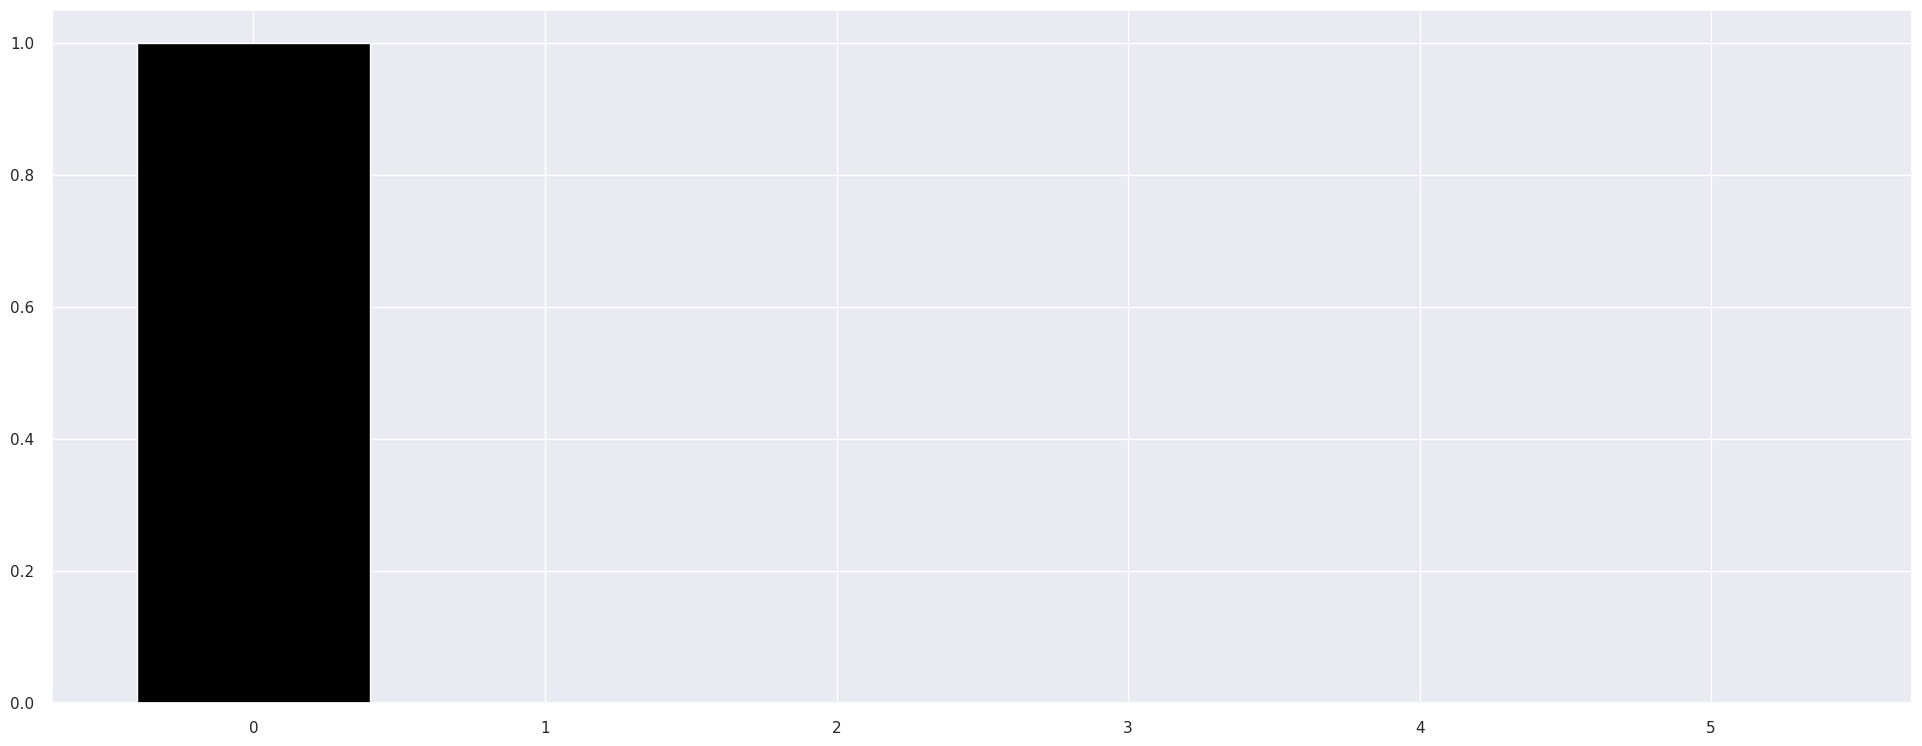

In [70]:
# PCA
pca = dd.PCA(n_components=X.shape[1])

principal_components = pca.fit_transform(X)

features = range(pca.n_components_)

plt.bar(features, pca.explained_variance_ratio_, color='black')

df_pca = pd.DataFrame(principal_components)

<AxesSubplot: xlabel='0', ylabel='1'>

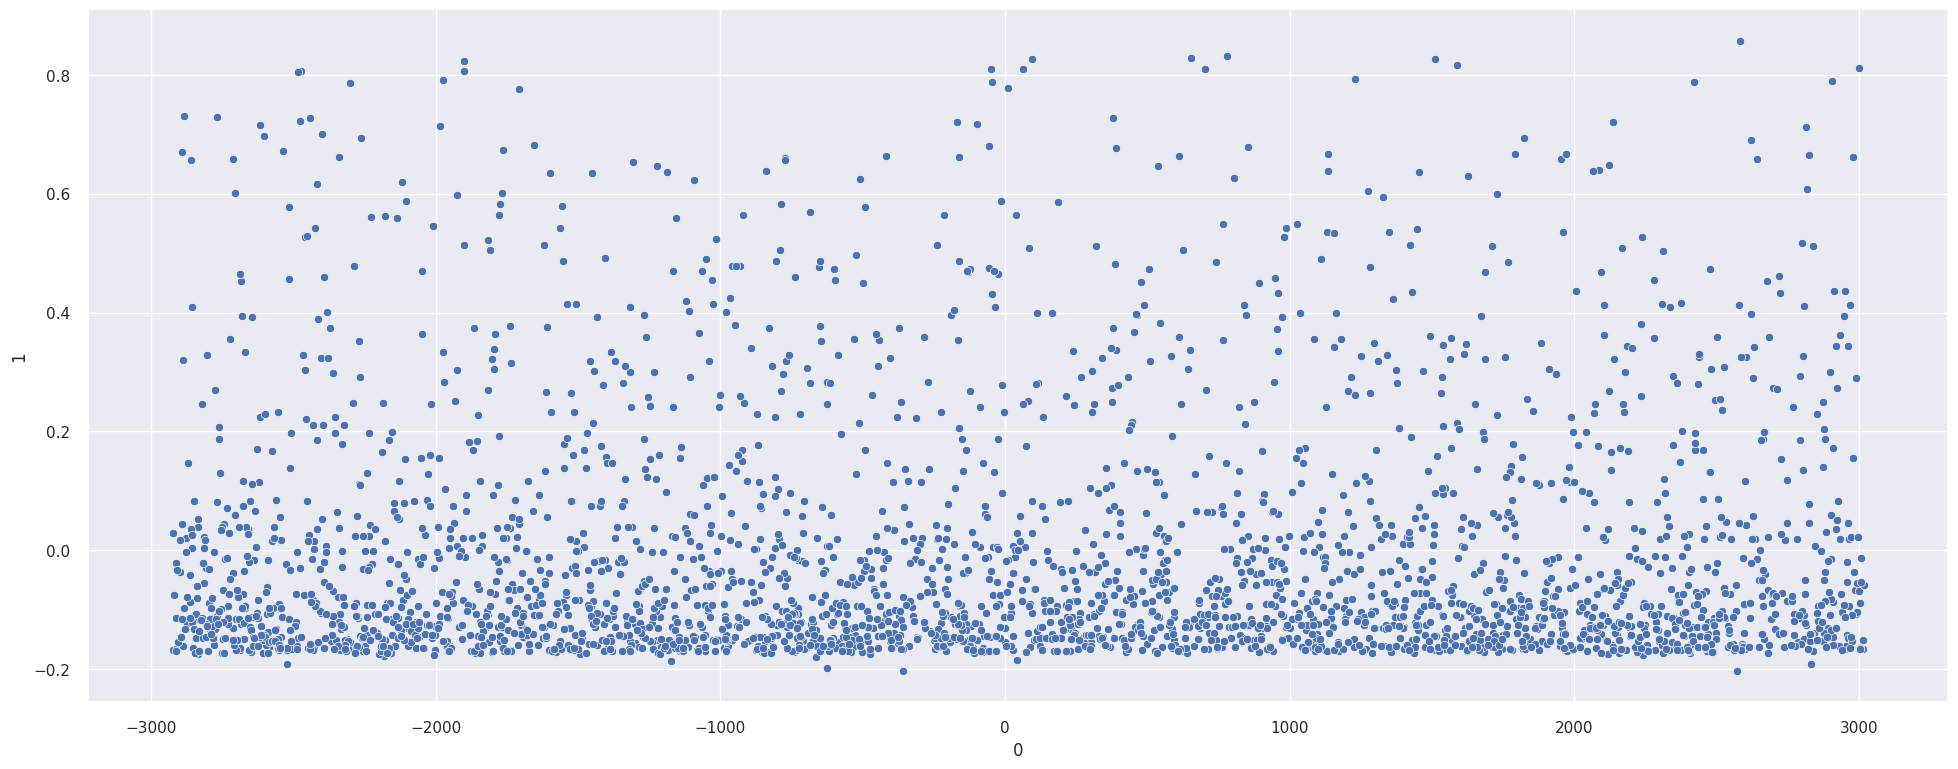

In [71]:
sns.scatterplot(x=0, y=1, data=df_pca)

### 7.3.2 - UMAP

/home/emersds/.pyenv/versions/3.8.10/envs/insiders_env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

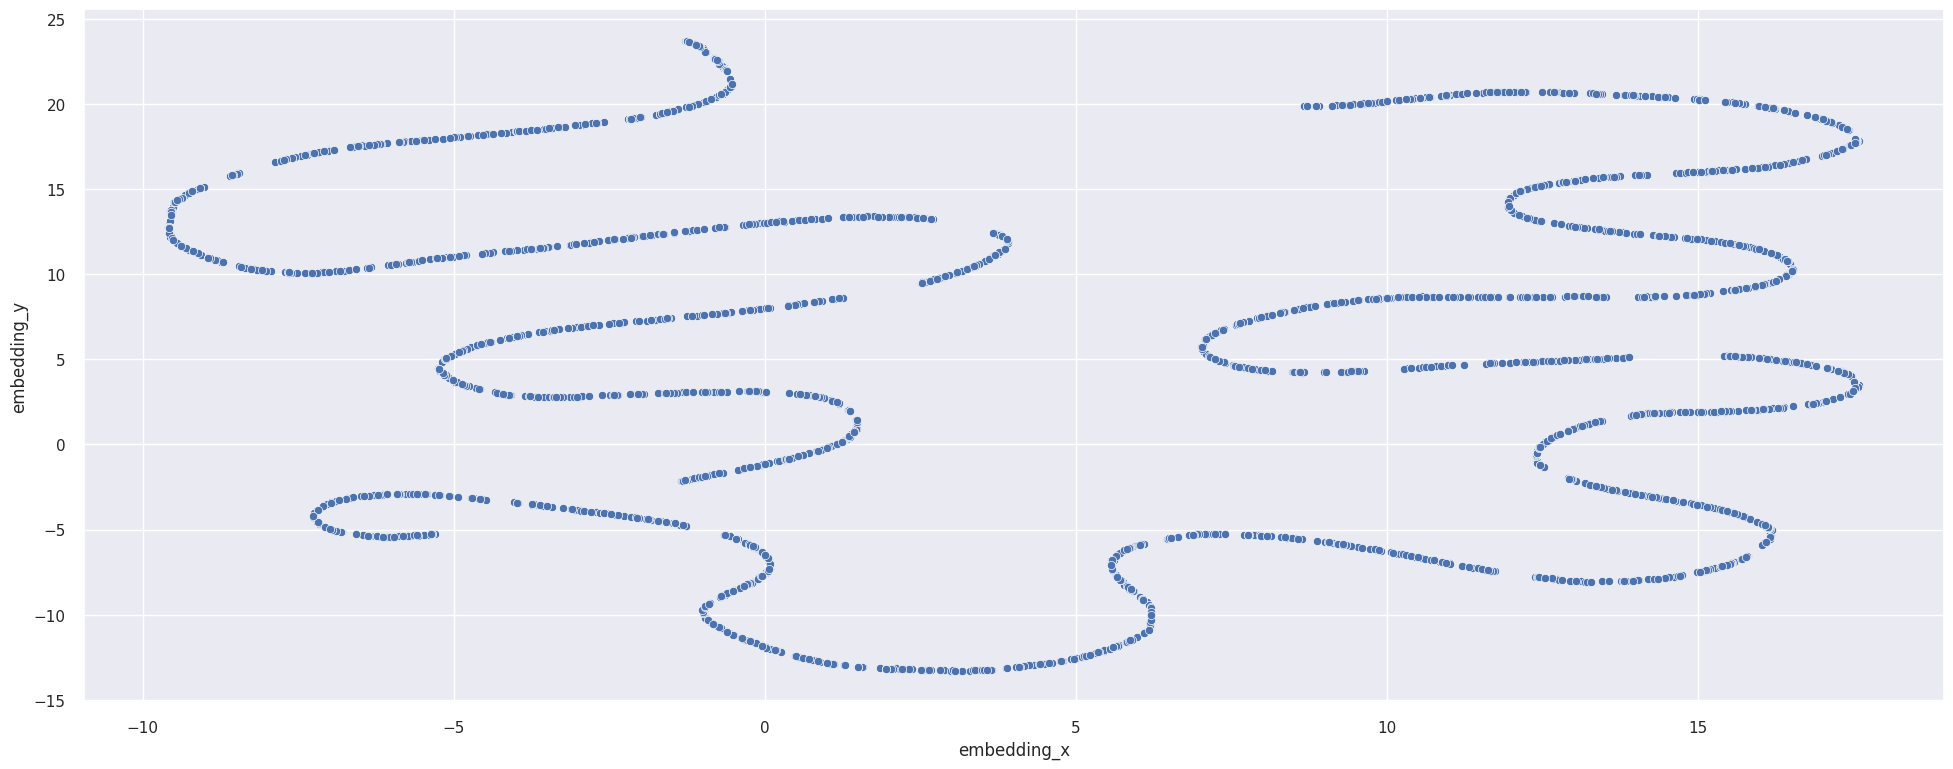

In [72]:
# UMAP
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 data=df_pca )


### 7.3.3 - t-SNE

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

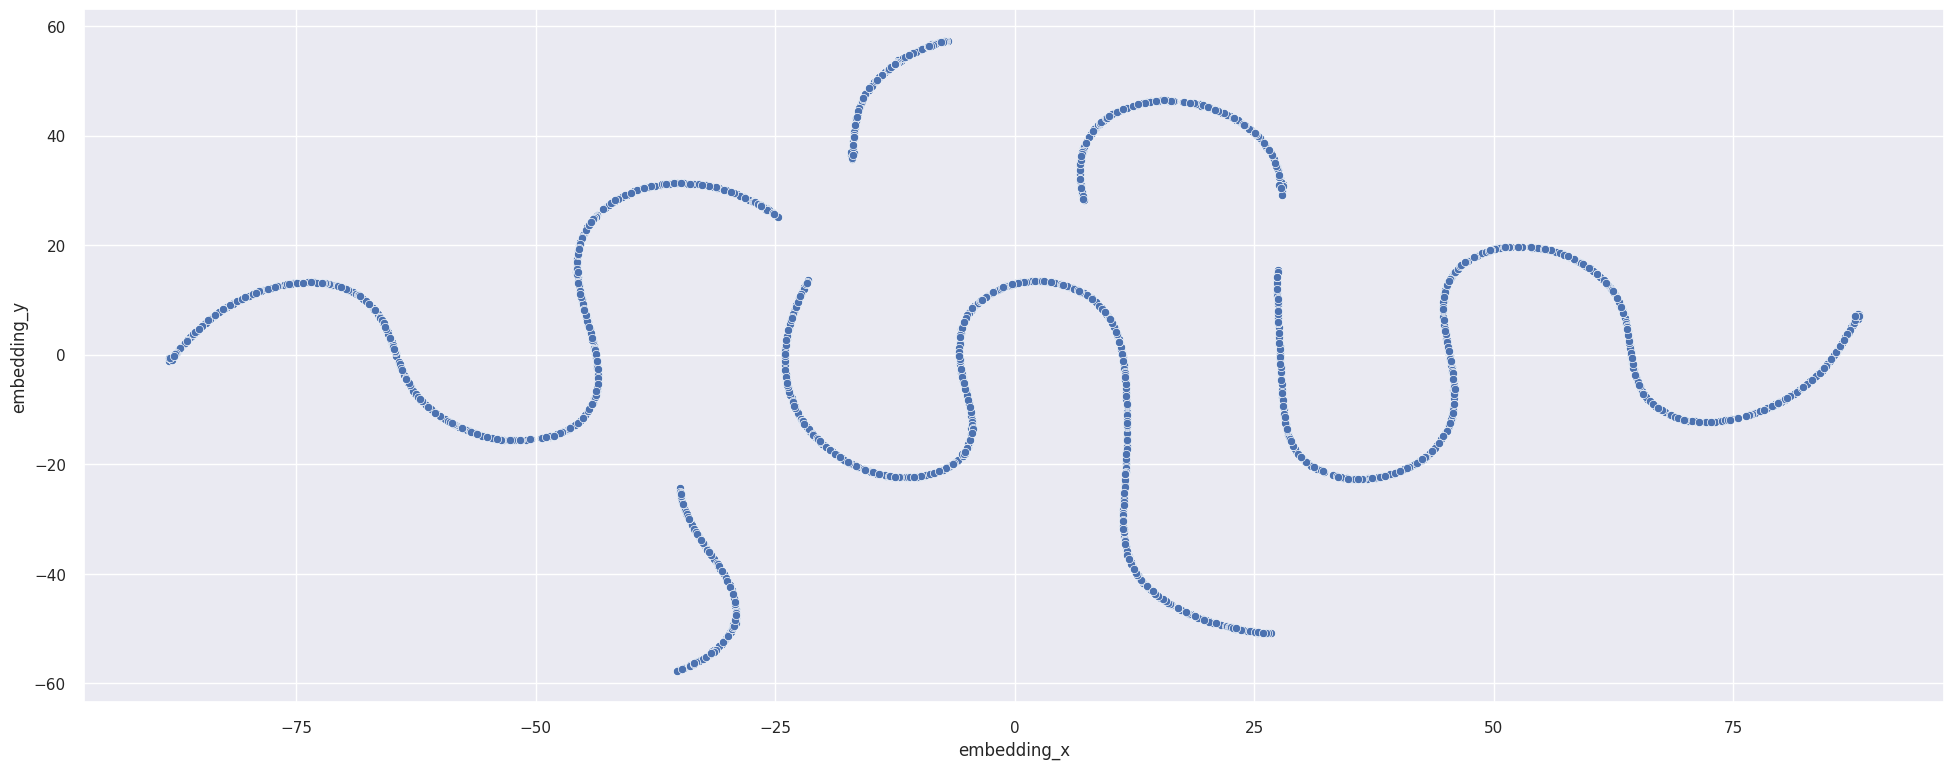

In [73]:
# t-SNE
reducer = TSNE( n_components=2, n_jobs=-1, random_state=42 )
embedding = reducer.fit_transform( X )

# embedding
df_pca['embedding_x'] = embedding[:, 0]
df_pca['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 data=df_pca )


### 7.3.4 - TREE-BASED EMBEDDING

In [74]:
# Tree-Based Embedding
from sklearn import ensemble as en
X = df20.drop(columns=['customer_id', 'gross_revenue'], axis=1)
y = df20['gross_revenue']

# model definition
rf_model = en.RandomForestRegressor(n_estimators=100, random_state=42)

# model training
rf_model.fit(X, y)

# Leaf
df_leaf = pd.DataFrame(rf_model.apply(X))


/home/emersds/.pyenv/versions/3.8.10/envs/insiders_env/lib/python3.8/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

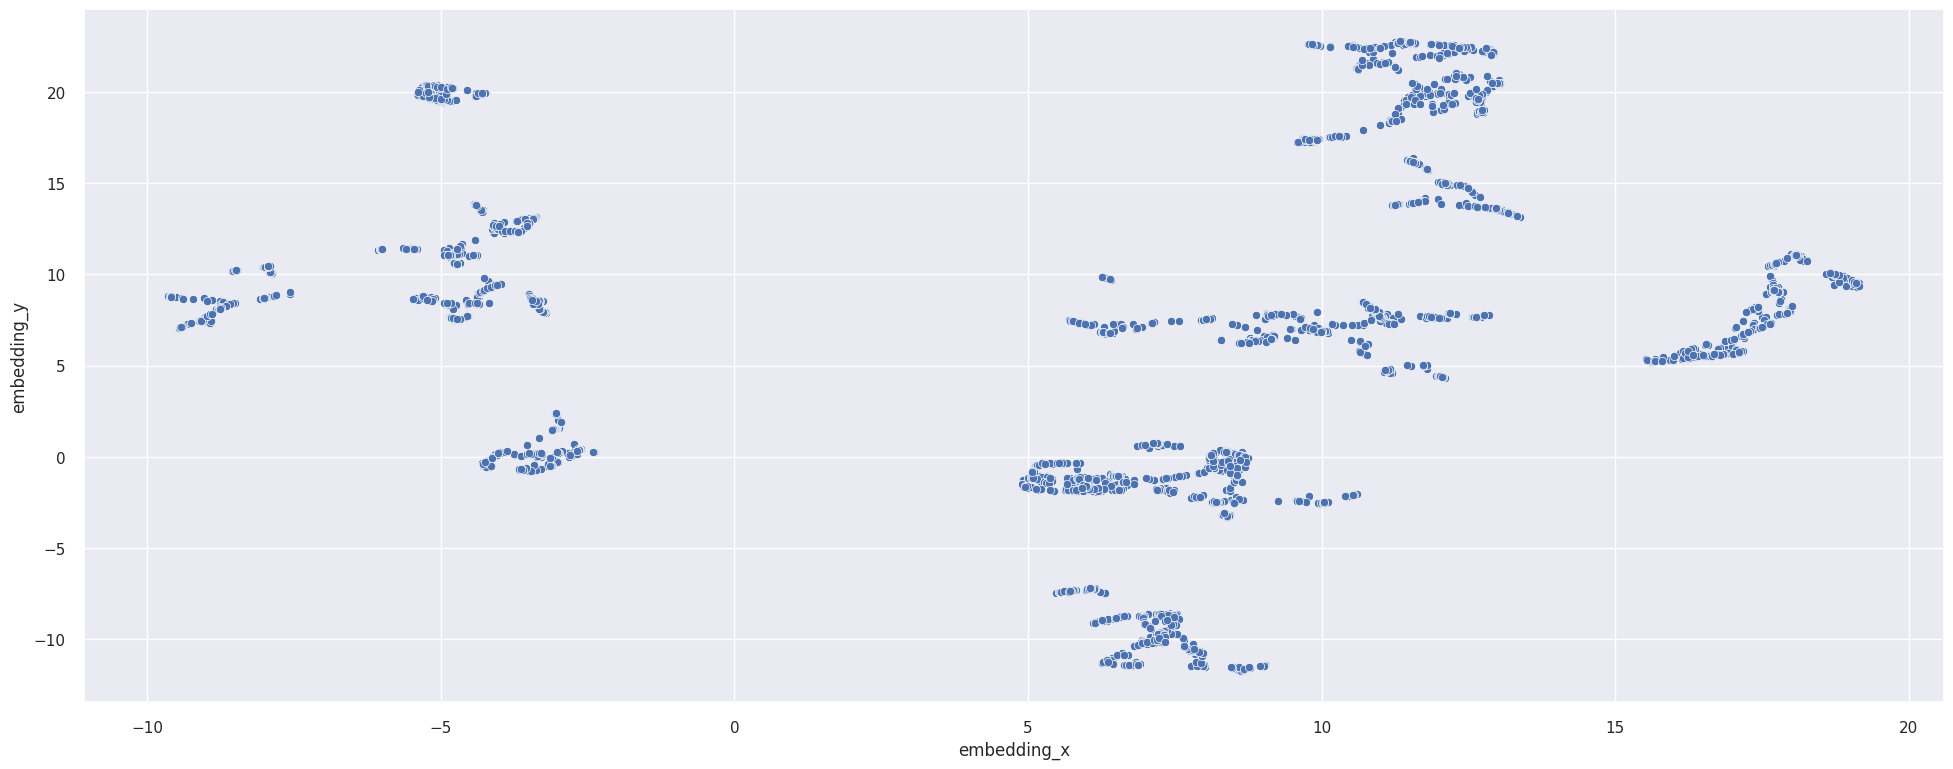

In [75]:
# Reduzindo a dimensionalidade da árvore através do UMAP
reducer = umap.UMAP( random_state=42 )
embedding = reducer.fit_transform( df_leaf )

# embedding
df_tree = pd.DataFrame()
df_tree['embedding_x'] = embedding[:, 0]
df_tree['embedding_y'] = embedding[:, 1]

# plot UMAP
sns.scatterplot( x='embedding_x', y='embedding_y', 
                 data=df_tree )


# 8.0 - PREPARAÇÃO DOS DADOS

In [76]:
# df5 = df4.copy()
df5 = df_tree.copy()

In [77]:
# df5_aux = df4.copy()

In [78]:
# ## Standard Scalaer
# mm = pp.MinMaxScaler()
# ss = pp.StandardScaler()
# rs = pp.RobustScaler()

# df5['gross_revenue'] = mm.fit_transform( df5[['gross_revenue']] )
# df5['recency_days'] = mm.fit_transform( df5[['recency_days']] )
# # df5['qtde_invoices'] = mm.fit_transform( df5[['qtde_invoices']] )
# # df5['qtde_items'] = mm.fit_transform( df5[['qtde_items']] )
# df5['qtde_products'] = mm.fit_transform( df5[['qtde_products']] )
# # df5['avg_ticket'] = mm.fit_transform( df5[['avg_ticket']] )
# # df5['avg_recency_days'] = mm.fit_transform( df5[['avg_recency_days']] )
# df5['frequency'] = mm.fit_transform( df5[['frequency']] )
# df5['qtde_returns'] = mm.fit_transform( df5[['qtde_returns']] )
# # df5['avg_basket_size'] = mm.fit_transform( df5[['avg_basket_size']] )
# # df5['avg_unique_basket_size'] = mm.fit_transform( df5[['avg_unique_basket_size']] )

# variable = 'recency_days'


In [79]:
# # Dados as IS
# print( 'Min:{} - Max{}'.format( df5_aux[variable].min(), df5_aux[variable].max() ) )
# sns.displot( df5_aux[variable] );


In [80]:
# # Dados Normalizados/Rescalados
# print( 'Min:{} - Max{}'.format( df5[variable].min(), df5[variable].max() ) )
# sns.displot( df5[variable] );

# 9.0 - SELEÇÃO DE VARIÁVEIS

* De acordo com análise do negócio, não faz sentido features que calculam a média, visto que será feita a média no final, na apresentação para o time de negócio.
* A quantidade de compras, itens, produtos são features bastante relacionadas de acordo com o gráfico pair plot. Retiramos duas delas por isso. 

In [81]:
# cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']

In [82]:
# df6 = df5[cols_selected].copy()
df6 = df_tree.copy()

# 10.0 - HIPER PARÂMETROS FINE-TUNING

In [83]:
# X = df6.drop( columns=['customer_id'] )
X = df_tree.copy()

In [84]:
X.head()

,embedding_x,embedding_y
0,12.321455,20.787779
1,11.707592,13.996825
2,12.875731,20.300333
3,-3.122644,-0.387477
4,-5.145908,8.783358


In [85]:
# clusters = [2, 3, 4, 5, 6, 7, 8, 9]
clusters = np.arange( 2, 25, 1)
clusters

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24])

## 10.1 - K-Means

In [87]:
kmeans_list = []
for k in clusters:
    # model definition
    kmeans_model = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # model training
    kmeans_model.fit(X)

    # model predict
    labels = kmeans_model.predict(X)

    # model perfoemance
    sil = silhouette_score(X, labels, metric='euclidean')
    kmeans_list.append(sil)
    print(sil)

0.41374362
0.549349
0.56919533
0.5680924
0.55264306
0.65379566
0.67988497
0.6427025
0.663841
0.6076597
0.64489233
0.60432804
0.59588796
0.6098475
0.6090729
0.6481259
0.56718034
0.5524903
0.5932624
0.54180014
0.5505833
0.5815521
0.5570535


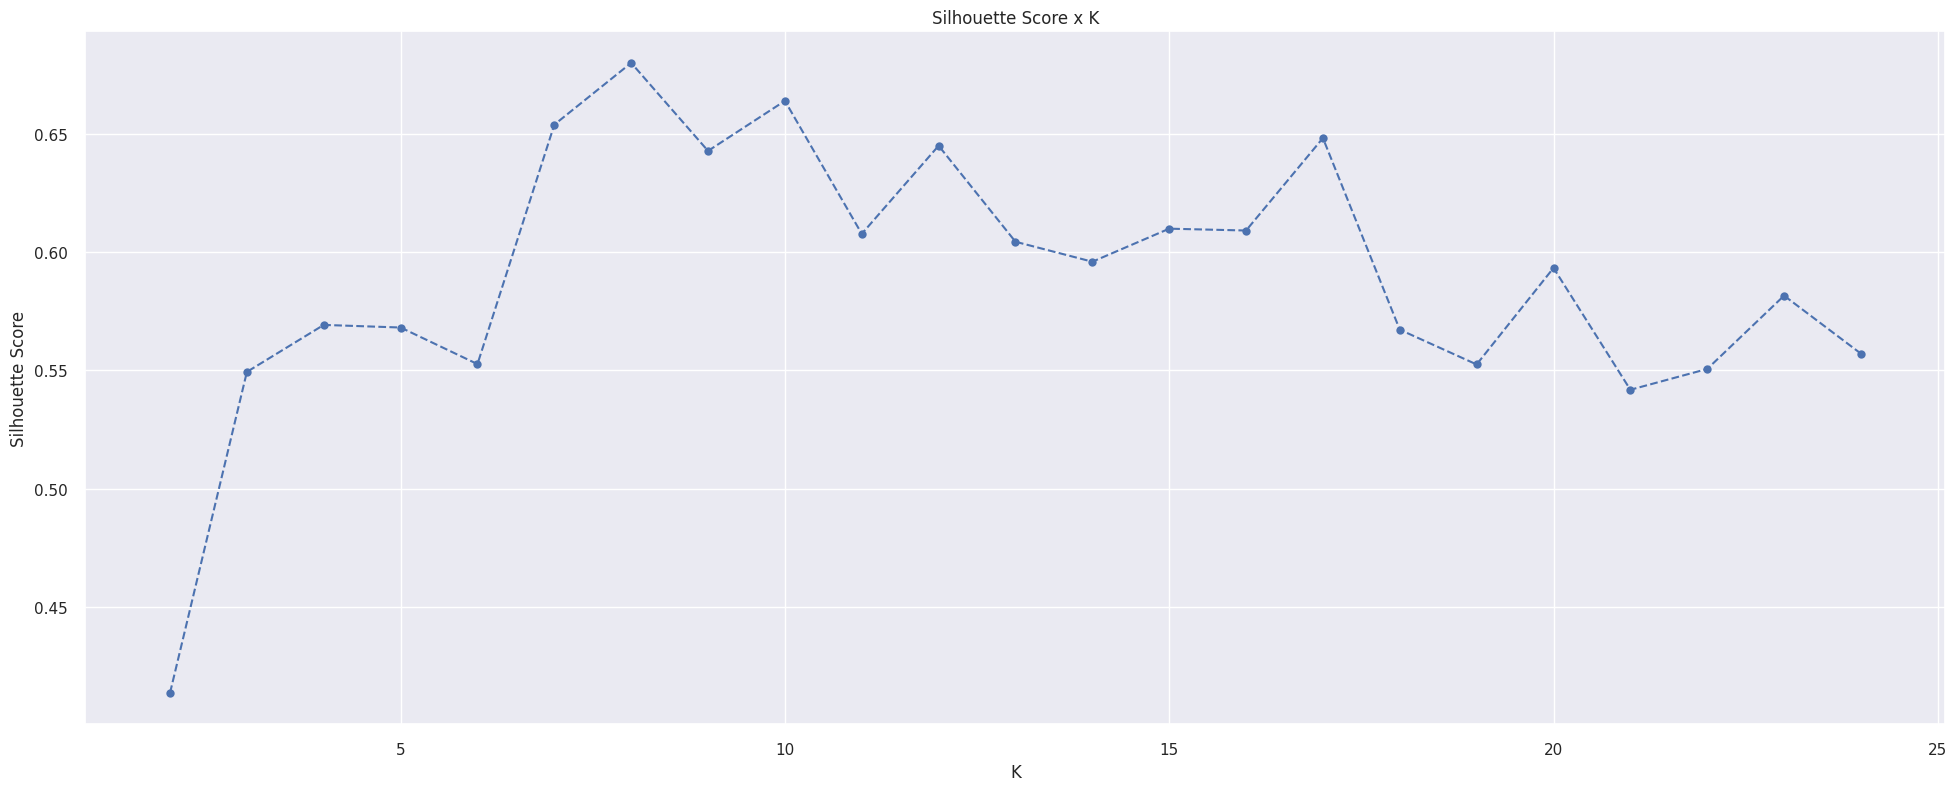

In [88]:
plt.plot(clusters, kmeans_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## 10.2 - GMM - Gaussian Mixture Model

In [90]:
gmm_list = []
for k in clusters:
    # model definition
    gmm_model = mx.GaussianMixture(n_components=k, n_init=10, max_iter=300, random_state=42)

    # model training
    gmm_model.fit(X)

    # model predict
    labels = gmm_model.predict(X)

    # model perfoemance
    sil = silhouette_score(X, labels, metric='euclidean')
    gmm_list.append(sil)
    print(sil)

0.4178671
0.49192822
0.37159863
0.46507597
0.47971928
0.53137916
0.5275885
0.6722267
0.6715023
0.6328227
0.6205674
0.62857157
0.5982749
0.5827277
0.49699715
0.556298
0.5411033
0.5973562
0.554785
0.56631964
0.5693962
0.5514643
0.5659312


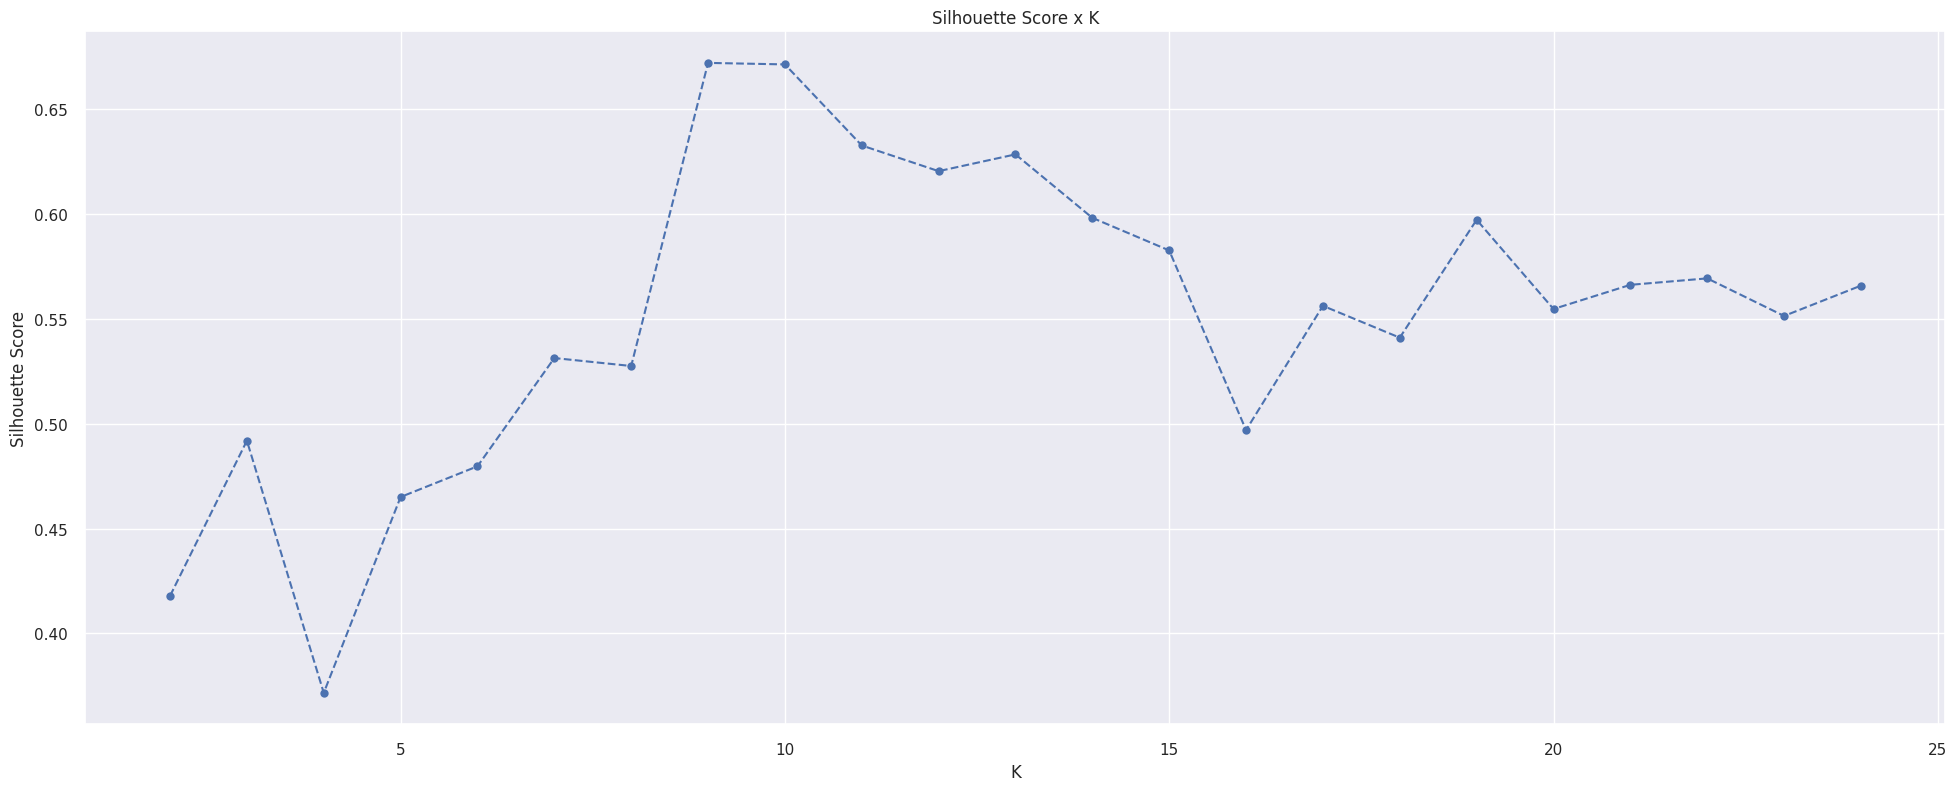

In [91]:
plt.plot(clusters, gmm_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

## 10.3 - Hierarchical Clustering

In [93]:
hc_list = []
for k in clusters:
    # model definition & training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    # model perfoemance
    sil = silhouette_score(X, labels, metric='euclidean')
    hc_list.append(sil)
    print(sil)

0.42069903
0.549349
0.57080615
0.5698304
0.6019693
0.65379566
0.67988497
0.67619085
0.6715023
0.65392816
0.64967066
0.6636301
0.6234204
0.61097264
0.61362356
0.5878609
0.60203266
0.5968904
0.60536116
0.6040834
0.601354
0.5994154
0.59616554


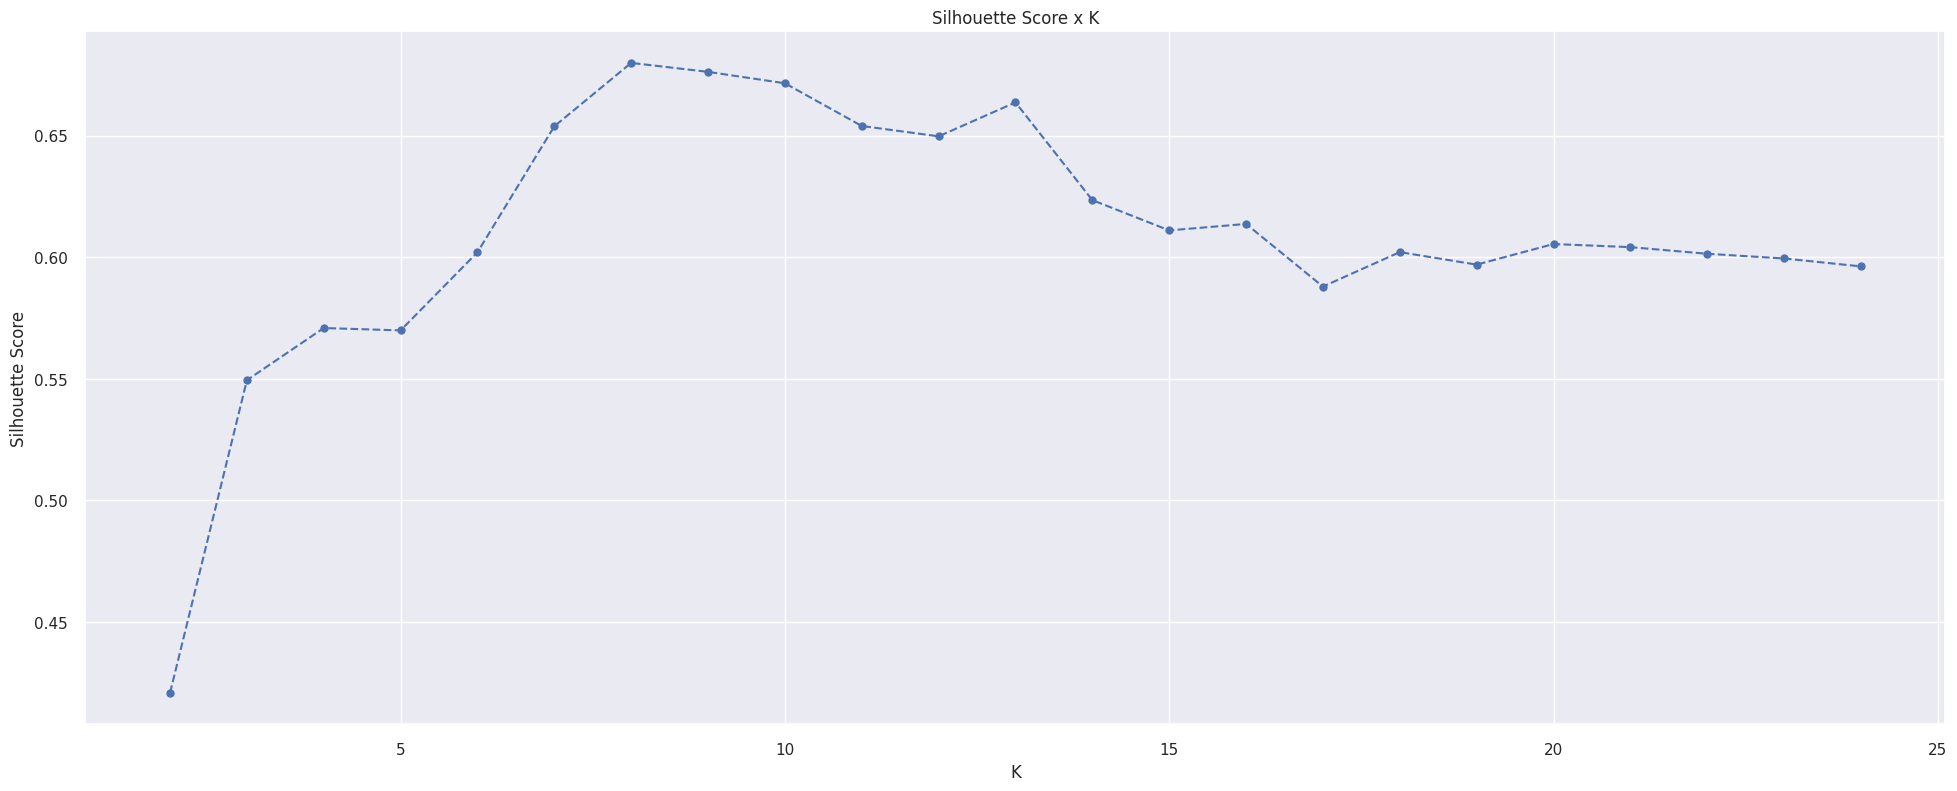

In [94]:
plt.plot(clusters, hc_list, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('Silhouette Score');
plt.title('Silhouette Score x K');

In [95]:
# hc.dendrogram(
#     hc_model,
#     truncate_mode='lastp',
#     p=12,
#     leaf_rotation=90.,
#     leaf_font_size=8,
#     show_contracted=True
# )

# plt.plot()

## 10.4 - DB SCAM

In [97]:
# Definição de parâmetros
eps = 2.00
min_samples = 20

# Definição e treinamento do modelo
db_model = DBSCAN(eps=eps, min_samples=min_samples, n_jobs=-1)
labels = db_model.fit_predict(X)

# Verifica o número de clusters encontrados (excluindo ruído, que é rotulado como -1)
num_clusters = len(set(labels)) - (1 if -1 in labels else 0)

# Verifica se o número de clusters é maior que 1 antes de calcular a pontuação de silhueta
if num_clusters > 1:
    sil = silhouette_score(X, labels, metric='euclidean')
    print('Silhouette Score: {}'.format(sil))
    print('Number of clusters: {}'.format(num_clusters))
else:
    print('Número insuficiente de clusters para calcular a pontuação de silhueta. Clusters encontrados: {}'.format(num_clusters))


Silhouette Score: 0.6292581558227539
Number of clusters: 10


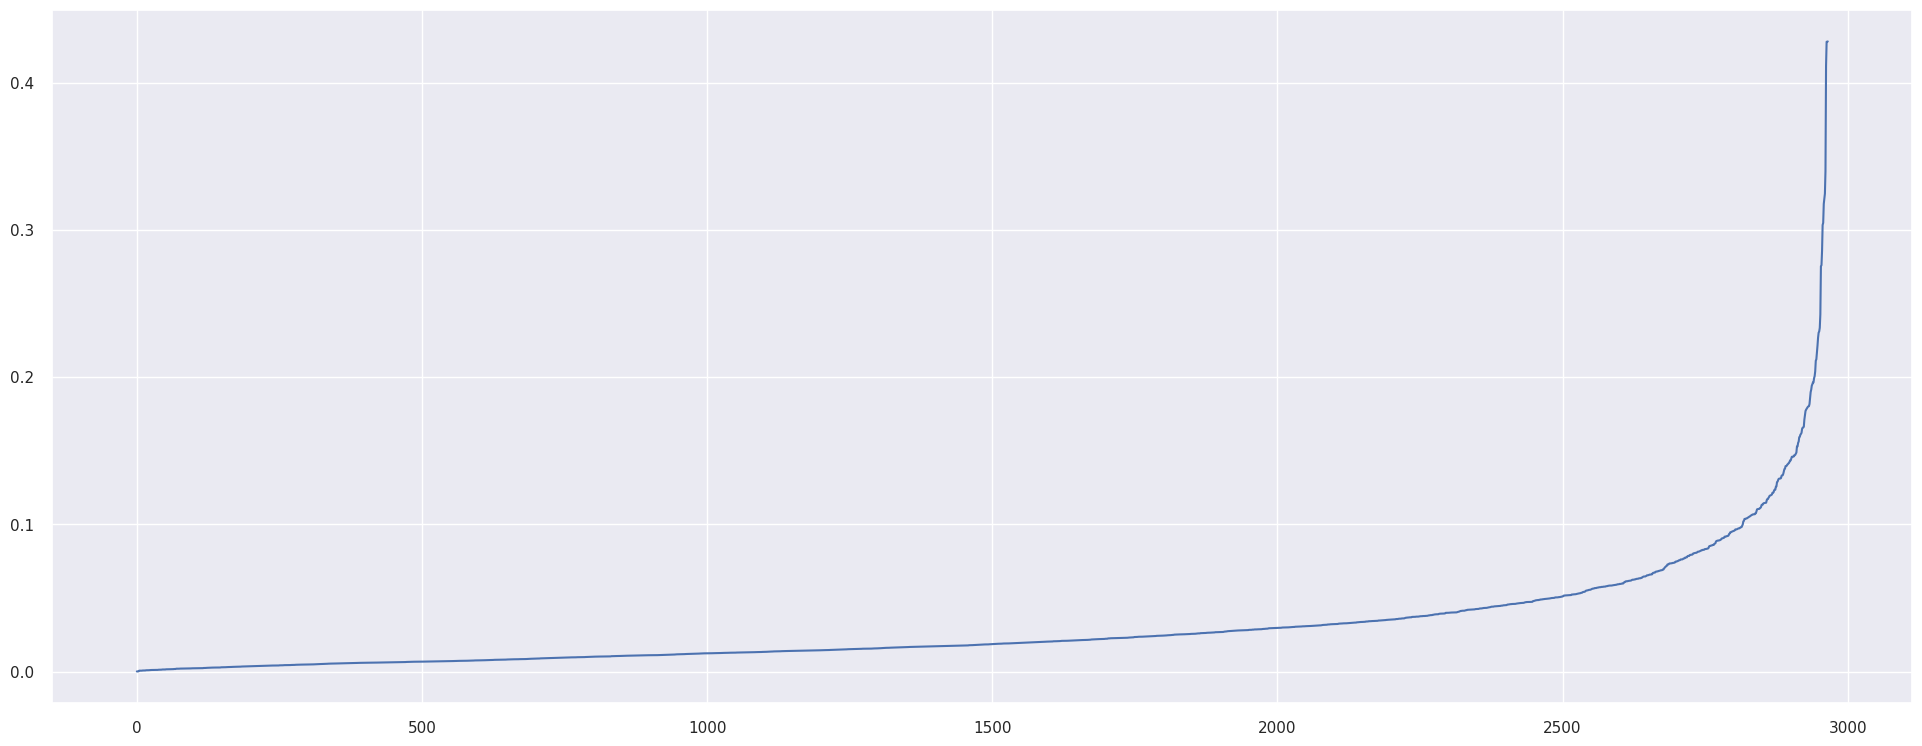

In [98]:
nh = NearestNeighbors(n_neighbors=k).fit(X)
distance, indices = nh.kneighbors(X)

distance = np.sort(distance, axis=0)
distance = distance[:, 1]
plt.plot(distance)

In [99]:
# db_list = [ 0.629258, 0.000000, 0.000000, 0.000000, 0.000000, 0.000000]

## 10.5 - Resultados 

In [100]:
# Model Name / k=2 / k=3 / k=5
df_results = pd.DataFrame(
    {
        'KMeans': kmeans_list,
        'GMM': gmm_list,
        'HC': hc_list,
        # 'DB': db_list
    }
).T

df_results.columns = clusters

In [101]:
df_results.style.highlight_max(color='darkgreen', axis=1)

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
KMeans,0.413744,0.549349,0.569195,0.568092,0.552643,0.653796,0.679885,0.642703,0.663841,0.607660,0.644892,0.604328,0.595888,0.609847,0.609073,0.648126,0.567180,0.552490,0.593262,0.541800,0.550583,0.581552,0.557054
GMM,0.417867,0.491928,0.371599,0.465076,0.479719,0.531379,0.527588,0.672227,0.671502,0.632823,0.620567,0.628572,0.598275,0.582728,0.496997,0.556298,0.541103,0.597356,0.554785,0.566320,0.569396,0.551464,0.565931
HC,0.420699,0.549349,0.570806,0.569830,0.601969,0.653796,0.679885,0.676191,0.671502,0.653928,0.649671,0.663630,0.623420,0.610973,0.613624,0.587861,0.602033,0.596890,0.605361,0.604083,0.601354,0.599415,0.596166


## 10.6 - Análise da Silhouetta

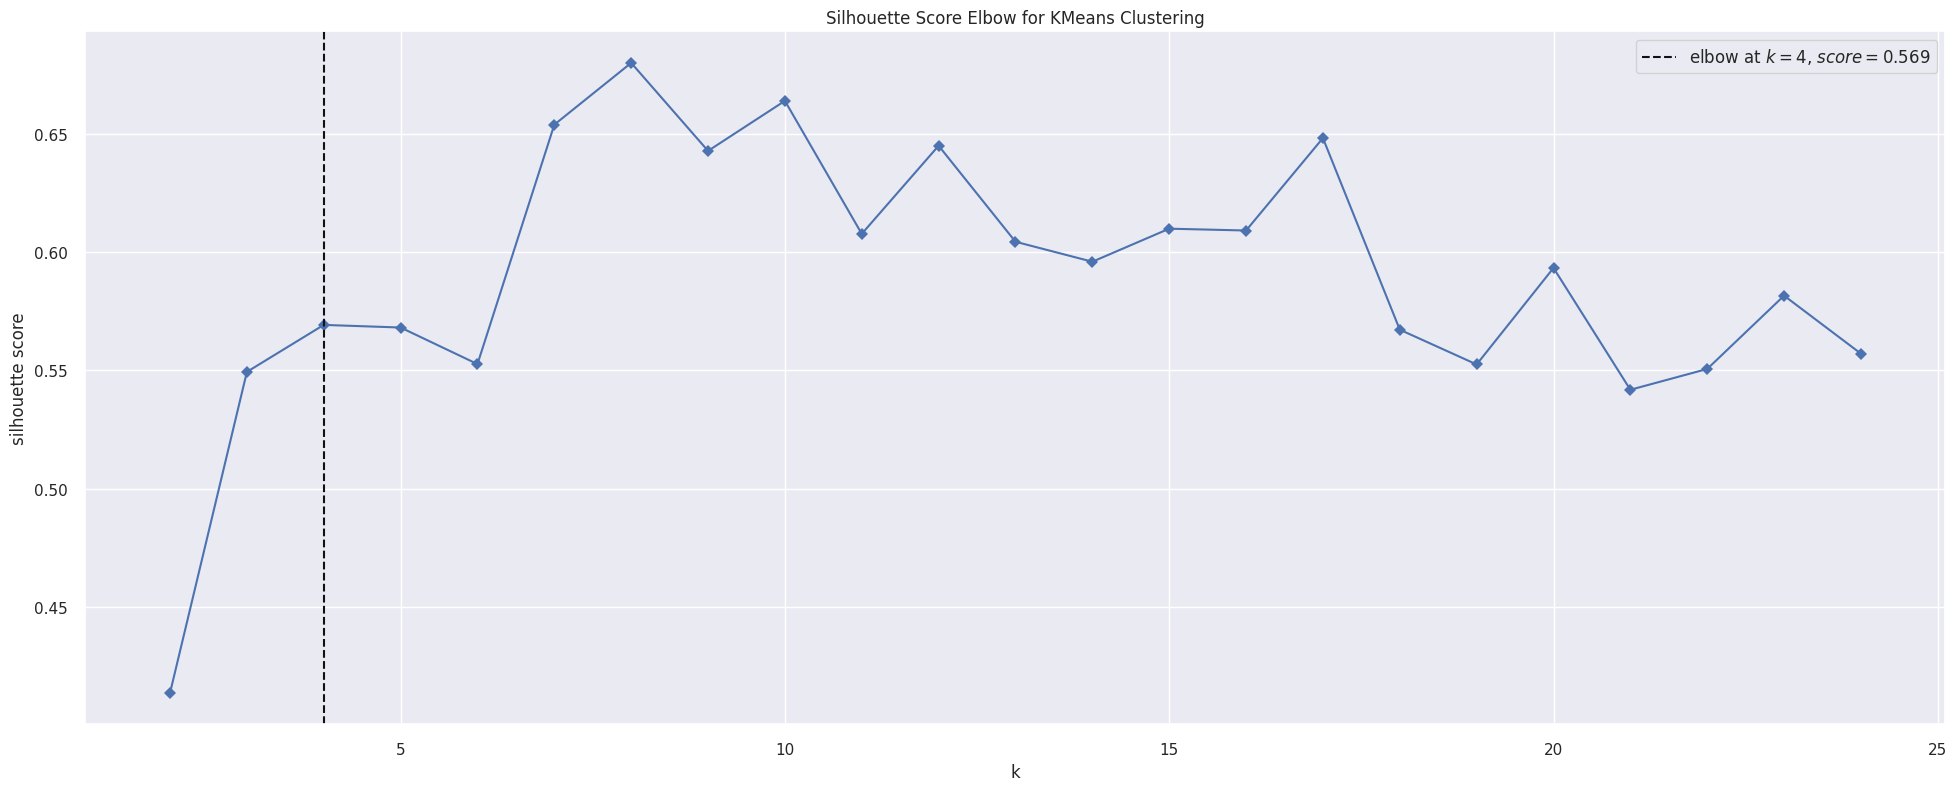

<AxesSubplot: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [102]:
kmeans = KElbowVisualizer( KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42), k=clusters, metric='silhouette', timings=False )
kmeans.fit( X )
kmeans.show()

For K = 2. Silhouette Score: 0.42069903016090393
For K = 3. Silhouette Score: 0.5493490099906921
For K = 4. Silhouette Score: 0.5708061456680298
For K = 5. Silhouette Score: 0.5698304176330566
For K = 6. Silhouette Score: 0.601969301700592
For K = 7. Silhouette Score: 0.6537956595420837


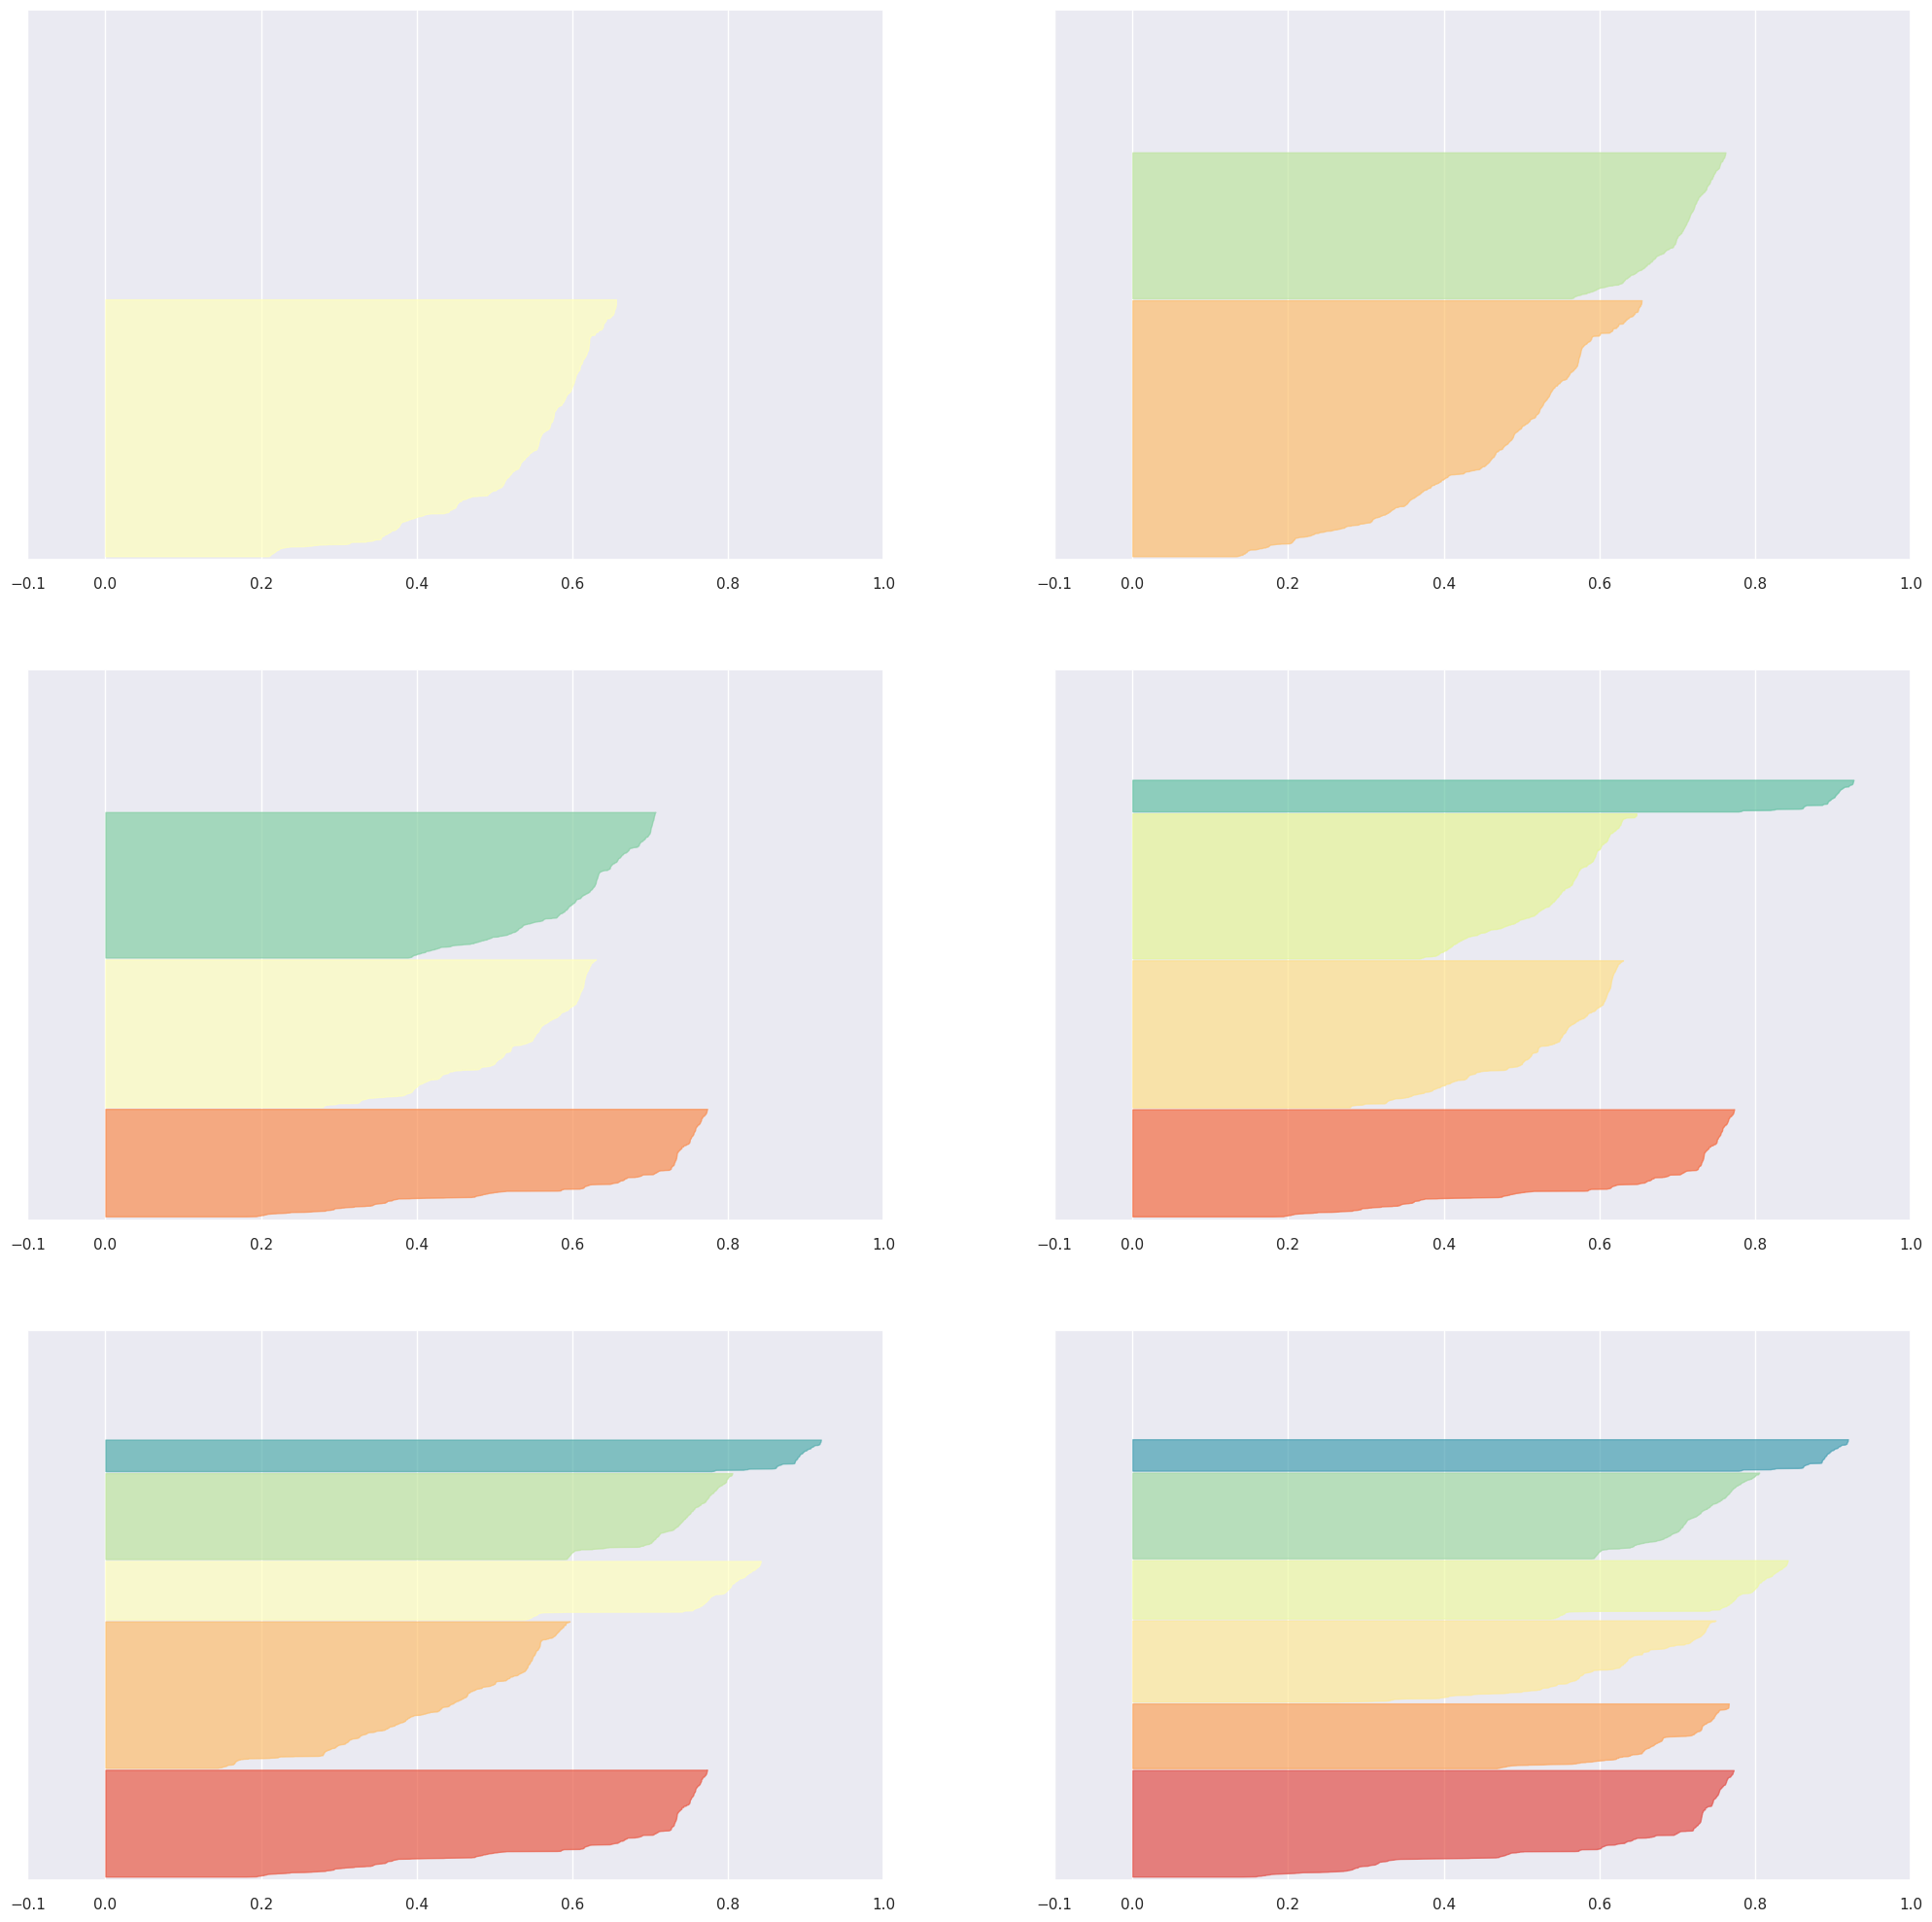

In [103]:
# Lista de valores de clusters
clusters = [2, 3, 4, 5, 6, 7]

fig, ax = plt.subplots(3, 2)
fig.set_size_inches(25, 25)

for k in clusters:
    q, mod = divmod(k, 2)
    
    ax[q-1, mod].set_xlim([-0.1, 1])
    ax[q-1, mod].set_ylim([0, len(X) + (k + 1) * 10])
    
    # model definition & training
    hc_model = hc.linkage(X, 'ward')

    # model predict
    labels = hc.fcluster(hc_model, k, criterion='maxclust')

    # performance
    ss = silhouette_score(X, labels, metric='euclidean')
    print('For K = {}. Silhouette Score: {}'.format(k, ss))

    samples_silhouette_values = silhouette_samples(X, labels)

    y_lower = 10
    for i in range(k):
        # select clusters
        ith_samples_silhouette_values = samples_silhouette_values[labels == i]
        
        # sort values
        ith_samples_silhouette_values.sort()

        # size clusters
        size_cluster_i = ith_samples_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        cmap = plt.get_cmap('Spectral')
        color = cmap(i / k)

        ax[q-1, mod].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_samples_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)
        
        y_lower = y_upper + 10
        
    ax[q-1, mod].set_yticks([])
    ax[q-1, mod].set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

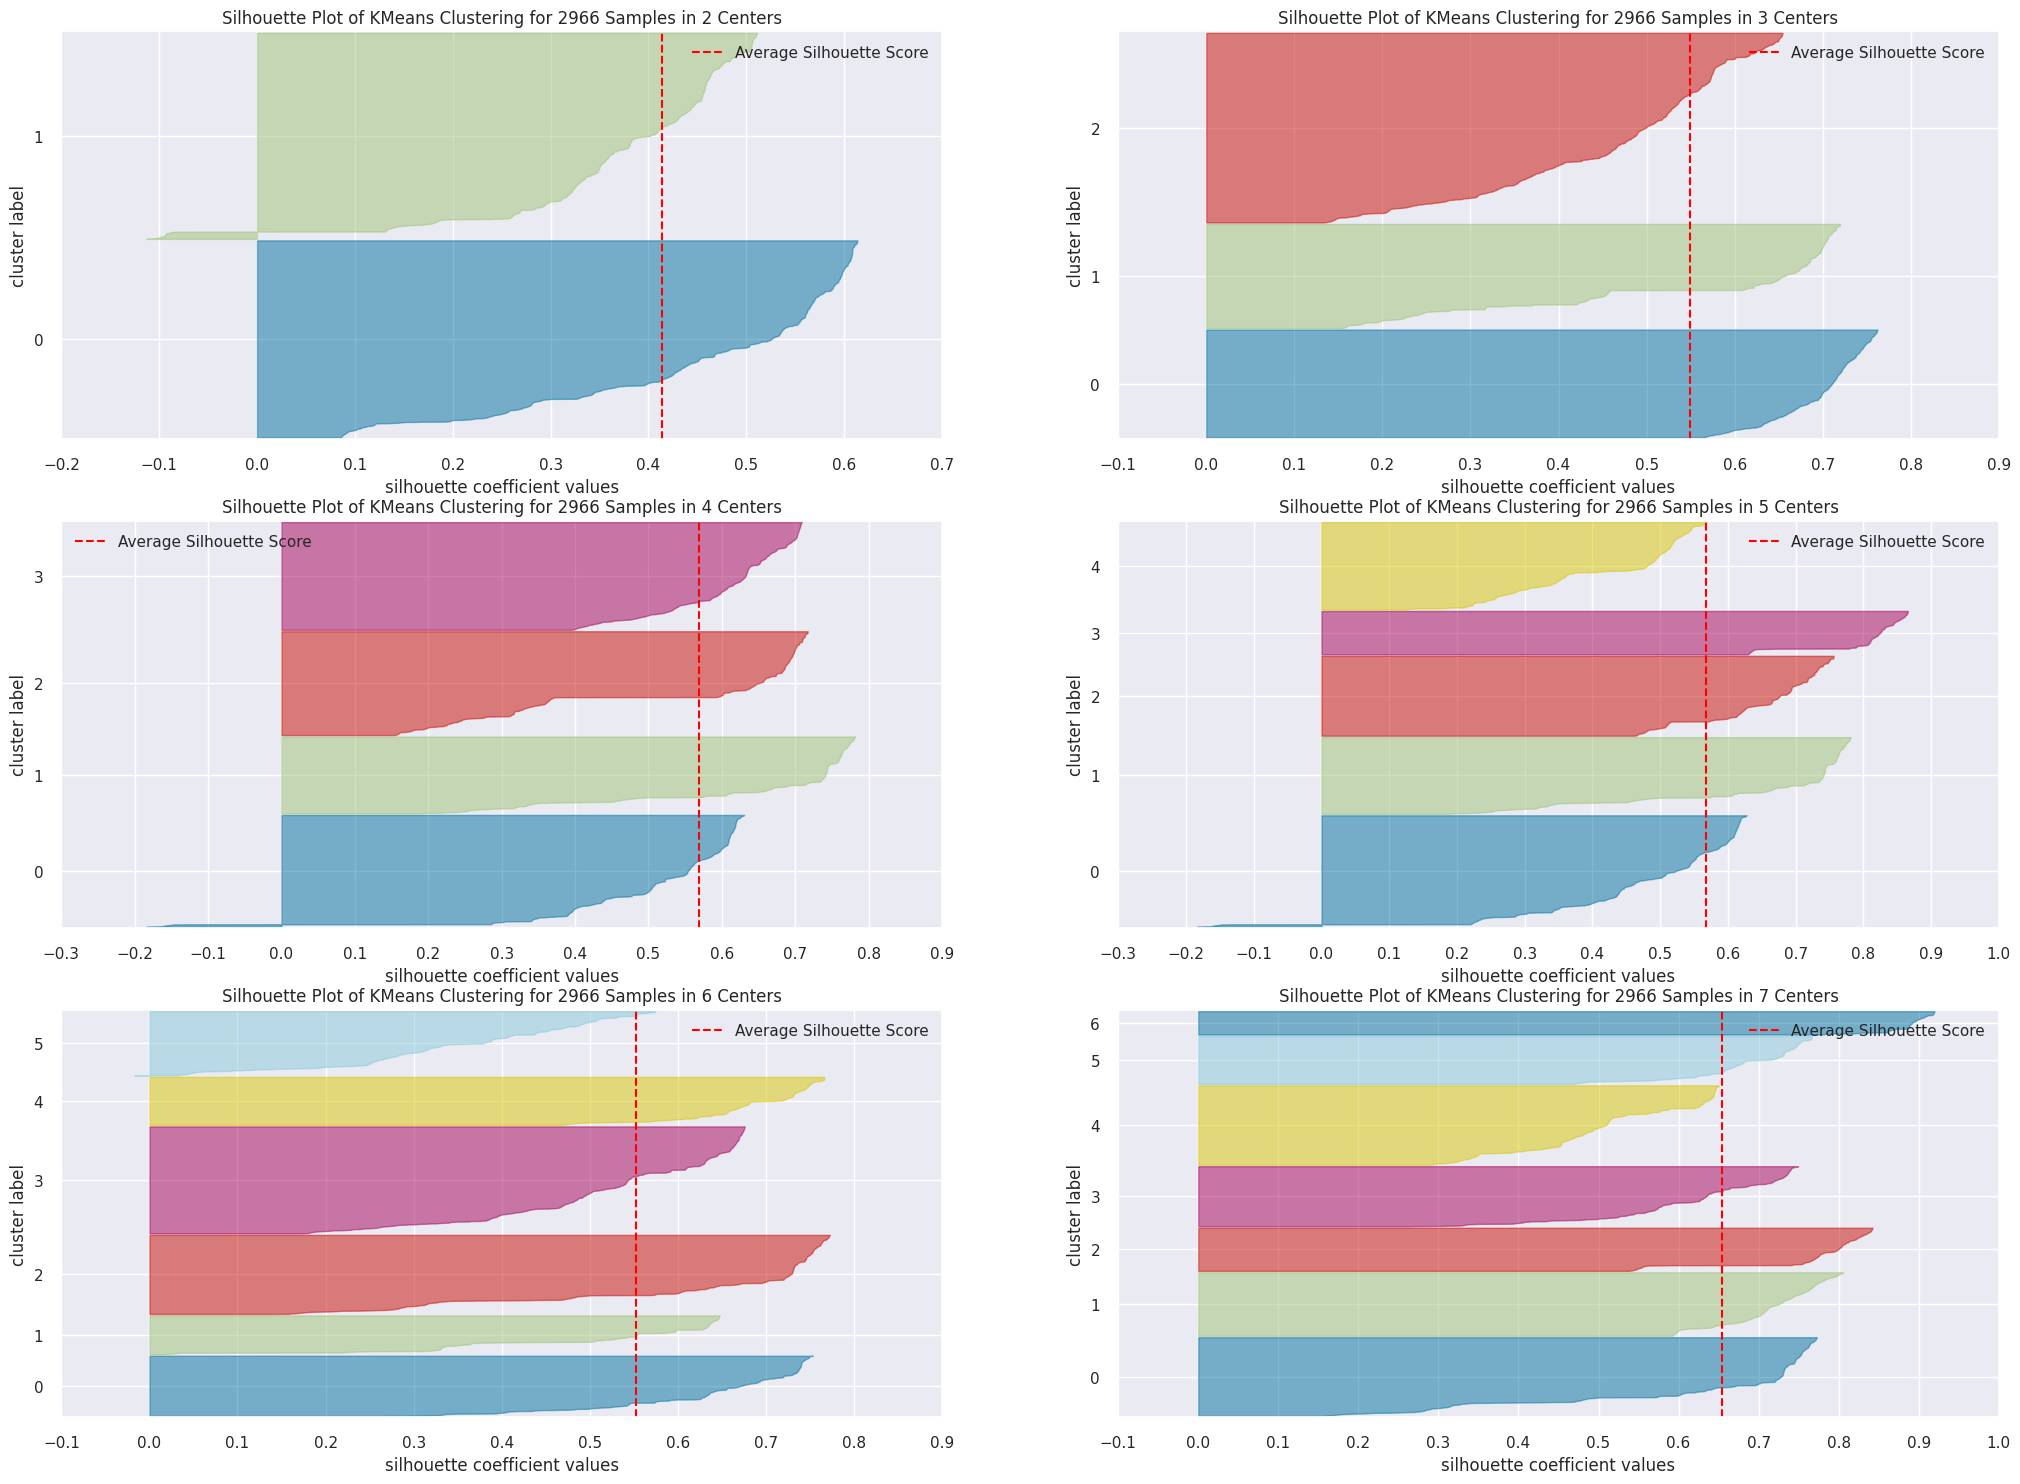

In [104]:
fig, ax = plt.subplots( 3, 2, figsize=(25, 18) )

for k in clusters:
    km = c.KMeans( n_clusters=k, init='random', n_init=10, max_iter=100, random_state=42 )
    q, mod = divmod( k, 2 )
    
    visualizer = SilhouetteVisualizer( km, colors='yellowbrick', ax=ax[q-1][mod] )
    visualizer.fit( X )
    visualizer.finalize()

## 10.7 - WSS - Within-Cluster Sum of Square

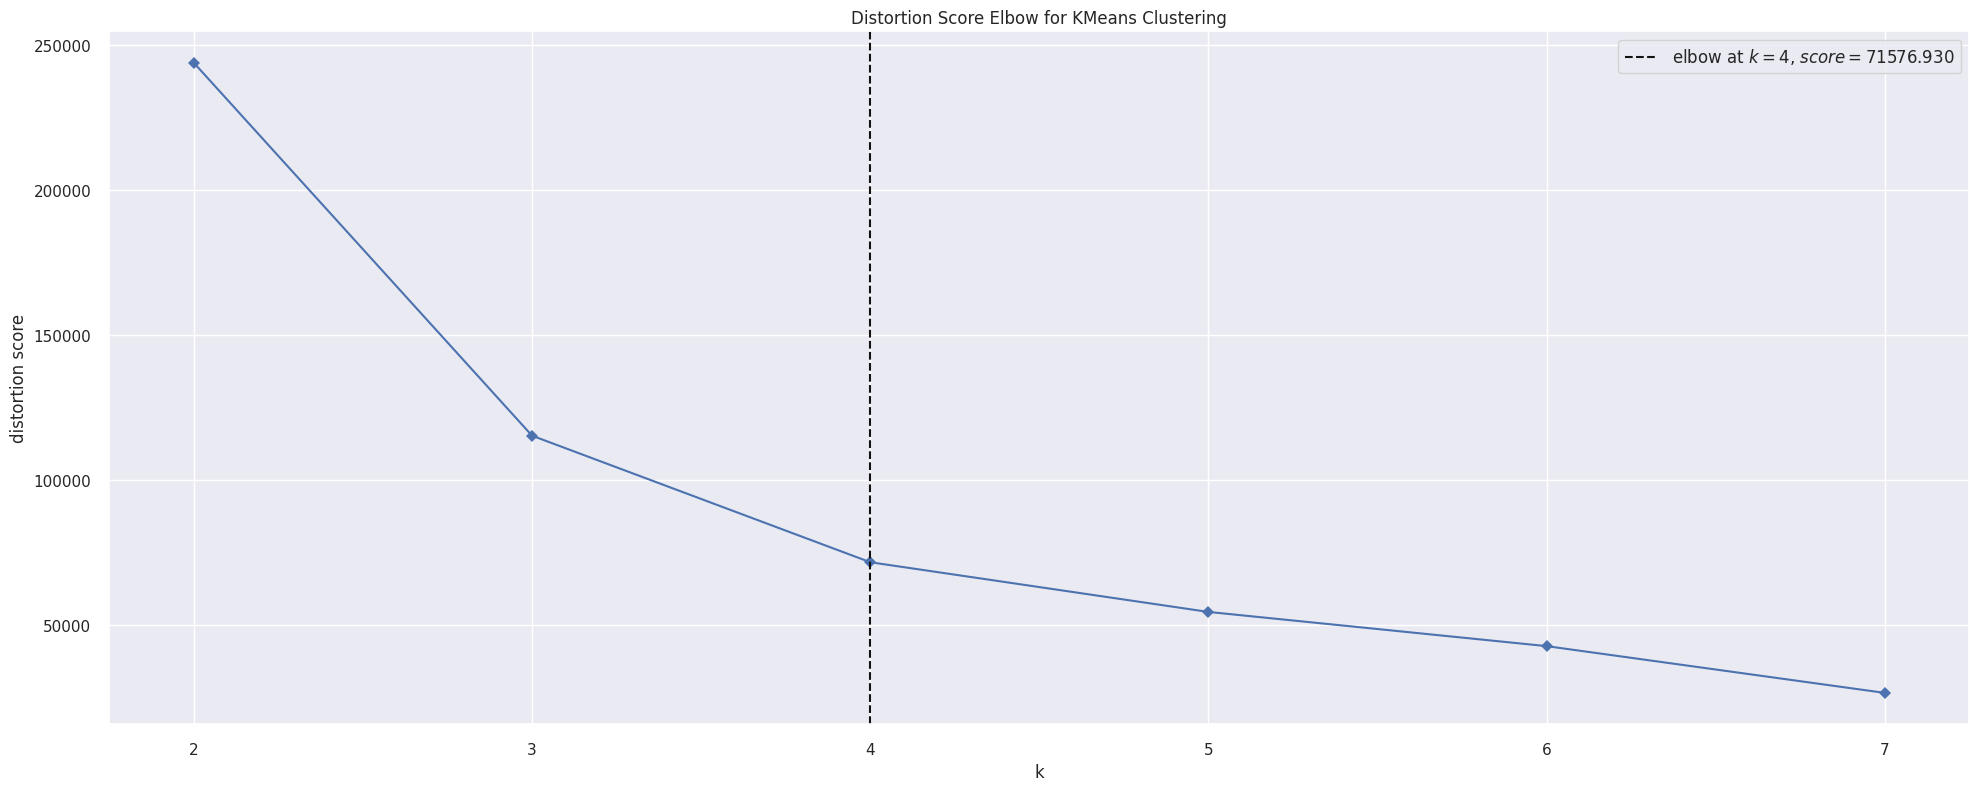

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [105]:
# Definindo o número de clusters
wss = []

for k in clusters:
    # Definindo o modelo K-means
    kmeans = KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)

    # Treinando o modelo
    kmeans.fit(X)

    # Calculando o Within-Cluster Sum of Squares (WSS) e adicionando à lista
    wss.append(kmeans.inertia_)

# Visualizando o método do cotovelo com Yellowbrick
kmeans_visualizer = KElbowVisualizer(KMeans(init='random', n_init=10, max_iter=300, random_state=42), k=clusters, timings=False)
kmeans_visualizer.fit(X)
kmeans_visualizer.show()

# 11.0 - TREINANDO O MODELO FINAL

In [106]:
k = 8
# model definition -> 8 Clusters
kmeans = c.KMeans(init='random', n_clusters=k, n_init=300, max_iter=300, random_state=42)

# model training
kmeans.fit(X)

# model predict
labels = kmeans.predict(X)

# model perfoemance
sil = silhouette_score(X, labels, metric='euclidean')
kmeans_list.append(sil)
print(sil)

0.67988497


In [107]:
# # model definition -> 9 Clusters
# gmm_model = mx.GaussianMixture(n_components=9, n_init=300, max_iter=300, random_state=42)

# # model training
# gmm_model.fit(X)

# # model predict
# labels = gmm_model.predict(X)

# # model perfoemance
# sil = silhouette_score(X, labels, metric='euclidean')
# gmm_list.append(sil)
# print(sil)

In [108]:
# # model definition & training  -> 8 clusters
# hc_model = hc.linkage(X, 'ward')

# # model predict
# labels = hc.fcluster(hc_model, k, criterion='maxclust')

# # model perfoemance
# sil = silhouette_score(X, labels, metric='euclidean')
# hc_list.append(sil)
# print(sil)

## 11.2 - Cluster Validation

In [109]:
# Cluster Validation
silhouette = silhouette_score(X, labels, metric='euclidean')
print(f'Silhouette Score: {silhouette}')

print( 'WSS value: {}'.format( kmeans.inertia_ ) )

Silhouette Score: 0.6798849701881409
WSS value: 17574.3828125


# 12.0 - ANÁLISE DOS CLUSTERS

In [110]:
# Cluster Analysis com Embedding Tree
df8 = X.copy()
df8['cluster'] = labels
df8.head()

,embedding_x,embedding_y,cluster
0,12.321455,20.787779,1
1,11.707592,13.996825,1
2,12.875731,20.300333,1
3,-3.122644,-0.387477,7
4,-5.145908,8.783358,0


In [111]:
# # Cluster Analysis sem Embedding Tree e retirando as variáveis que não são do negócio
# df8 = df4.copy() 
# cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']
# df8 = df8[cols_selected]
# df8['cluster'] = labels
# df8.head() 

## 12.1 - Inspeção Visual

<AxesSubplot: xlabel='embedding_x', ylabel='embedding_y'>

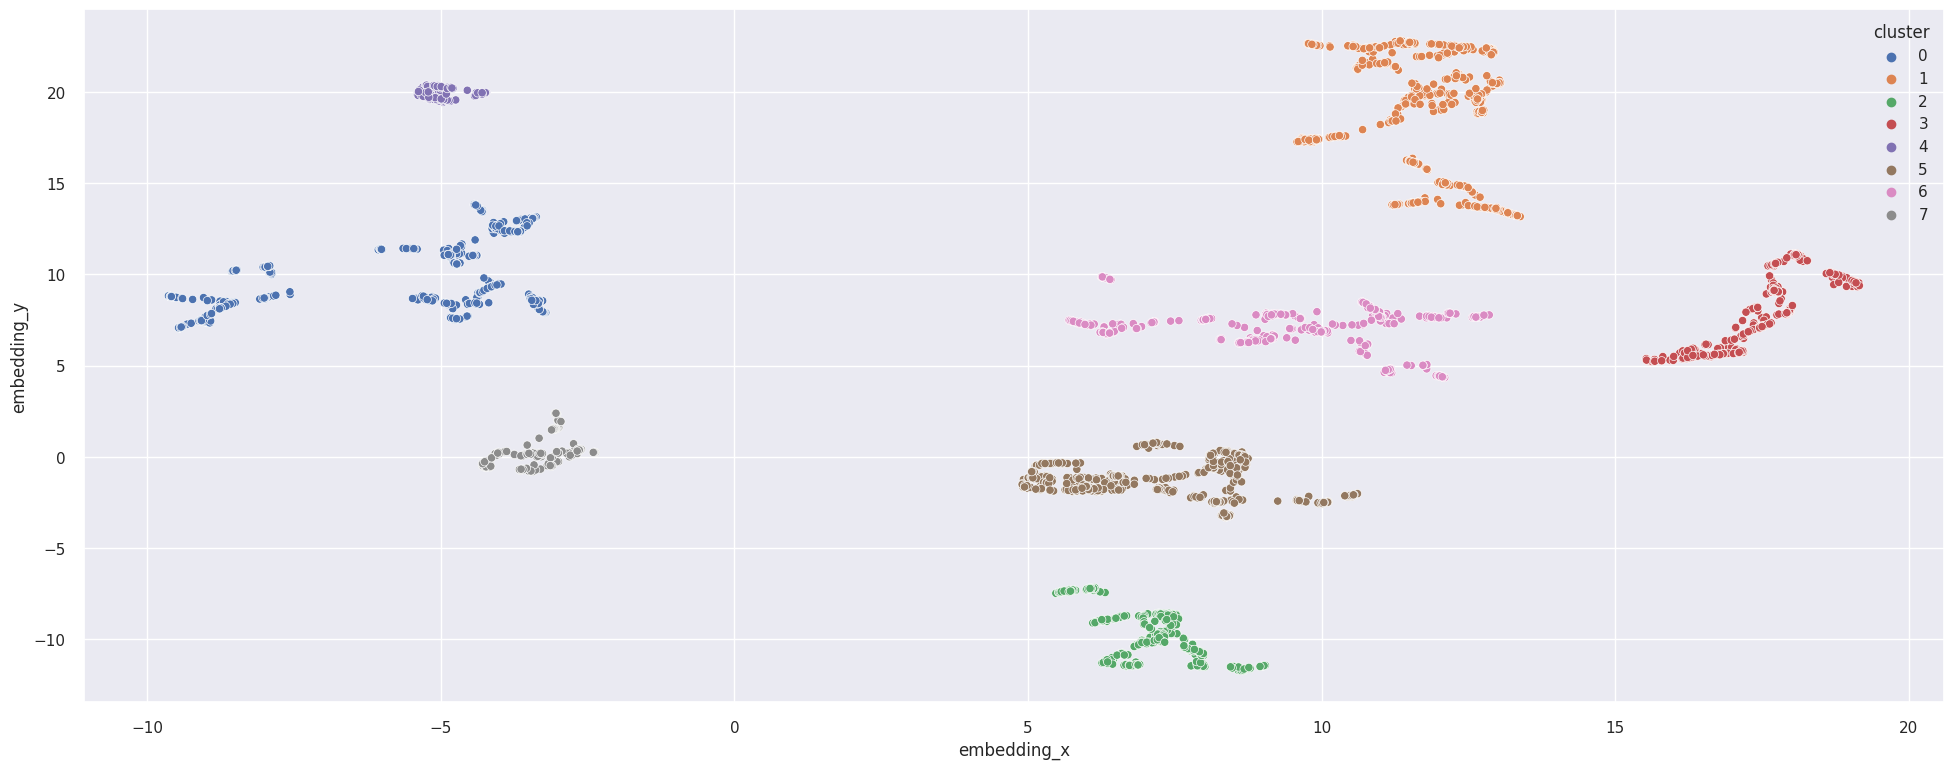

In [112]:
sns.scatterplot( x='embedding_x', y='embedding_y', hue='cluster', data=df8, palette='deep' )

In [113]:
# visualizer = SilhouetteVisualizer( kmeans, colors='yellowbrick' )
# visualizer.fit( X )
# visualizer.finalize()

In [114]:
# # 2dplot
# df_viz = df8.drop( columns='customer_id', axis=1 )
# sns.pairplot( df_viz, hue='cluster' )

In [115]:
# # UMAP
# reducer = umap.UMAP( n_neighbors=90, random_state=42 )
# embedding = reducer.fit_transform( X )

# # embedding
# df_viz['embedding_x'] = embedding[:, 0]
# df_viz['embedding_y'] = embedding[:, 1]        

# # plot UMAP
# sns.scatterplot( x='embedding_x', y='embedding_y', 
#                  hue='cluster',
#                  palette=sns.color_palette( 'hls', n_colors=len( df_viz['cluster'].unique() ) ),
#                  data=df_viz )

## 12.2 - PERFIL DOS CLUSTERS

In [116]:
df9 = df4.copy() 
cols_selected = ['customer_id', 'gross_revenue', 'recency_days', 'qtde_products', 'frequency', 'qtde_returns']
df9 = df9[cols_selected]
df9['cluster'] = labels
df9.head() 

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,37.0,1
1,13047,3232.59,56.0,171.0,0.028302,35.0,1
2,12583,6705.38,2.0,232.0,0.040323,50.0,1
3,13748,948.25,95.0,28.0,0.017921,0.0,7
4,15100,876.00,333.0,3.0,0.073171,22.0,0


In [117]:
# Number of customer
df_cluster = df9[['customer_id', 'cluster']].groupby( 'cluster' ).count().reset_index()
df_cluster['perc_customer'] = 100*( df_cluster['customer_id'] / df_cluster['customer_id'].sum() )

# Avg Gross revenue
df_avg_gross_revenue = df9[['gross_revenue', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_gross_revenue, how='inner', on='cluster' )

# Avg recency days
df_avg_recency_days = df9[['recency_days', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_avg_recency_days, how='inner', on='cluster' )

# Avg invoice_number
df_products = df9[['qtde_products', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_products, how='inner', on='cluster' )

# Frequency
df_frequency = df9[['frequency', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_frequency, how='inner', on='cluster' )

# Returns
df_returns = df9[['qtde_returns', 'cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster = pd.merge( df_cluster, df_returns, how='inner', on='cluster' )

df_cluster.sort_values( 'gross_revenue', ascending=False )

,cluster,customer_id,perc_customer,gross_revenue,recency_days,qtde_products,frequency,qtde_returns
1,1,590,19.892111,7678.947898,24.040678,367.542373,0.087298,120.893220
6,6,450,15.171949,2624.058844,52.606667,97.475556,0.047806,21.273333
3,3,359,12.103844,2435.569359,42.367688,129.972145,0.043584,15.426184
5,5,475,16.014835,1253.353663,60.538947,57.288421,0.048897,7.616842
2,2,323,10.890088,970.028793,74.752322,37.430341,0.074704,6.362229
7,7,175,5.900202,851.930743,93.125714,26.668571,0.161967,31.394286
0,0,488,16.453136,558.825225,130.188525,14.807377,0.350168,7.715164
4,4,106,3.573837,533.626792,44.716981,11.528302,0.011257,0.981132


# 13. ANÁLISE EXPLORATÓRIA FINAL DOS DADOS - MAPA DE HIPÓTESES

In [120]:
df10 = df9.copy()
df10.head()

,customer_id,gross_revenue,recency_days,qtde_products,frequency,qtde_returns,cluster
0,17850,5391.21,372.0,297.0,17.000000,37.0,1
1,13047,3232.59,56.0,171.0,0.028302,35.0,1
2,12583,6705.38,2.0,232.0,0.040323,50.0,1
3,13748,948.25,95.0,28.0,0.017921,0.0,7
4,15100,876.00,333.0,3.0,0.073171,22.0,0


## 14.1 Mapa Mental de Hipóteses

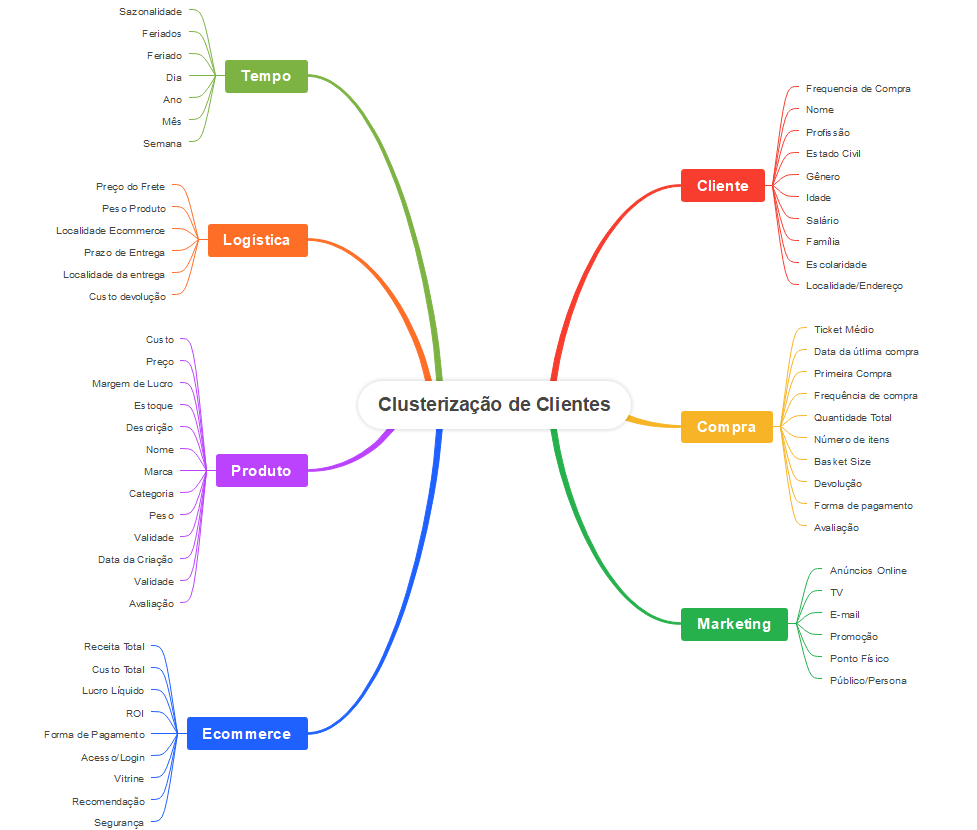

In [130]:
Image('img/mind_map_hip.png')

1. Fenômeno
2. Entidades (consumidor, localização, finanças, família)
3. Características da Entidade (Nome do consumidor, idade, salário, escolaridade)

## 14.2 Hipóteses de Negócio
1. Afirmação
2. Comparação entre variáveis
3. Valor base de comparação

1. Quem são as pessoas elegíveis para participar do programa Insiders?
2. Quantos clientes farão parte do grupo?
3. Quais as principais características desses clientes?
4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
5. Qual a expectativa de faturamento desse grupo para os proximos meses?
6. Quais as condições para uma pessoa ser elegível ao Insiders?
7. Quais as condições para uma pessoa ser removida do Insiders?
8. Qual a garantia que o programa Insiders é melhor que o restante da base?
9. Quais ações o time de marketing pode realizar para aumentar o faturamento?

## 14.3 Hipóteses Produto

1. 30% de todos os produtos em pacotes grandes são comprados pelos clientes do cluster insiders.
2. O peso médio dos produtos comprados pelos clientes do cluster insiders é maior do que o peso dos produtos comprados pelos outros clusters.
3. A idade média dos produtos comprados pelos clientes do clsuter insiders é menor do que 15 dias.

## 14.4 Hipóteses Cliente

1. 70% dos clientes do cluster insiders são solteiros.
2. 10% dos clientes do cluster insiders estão na faixa entre 24 a 35 anos.
3. 40% das localidades de entrega do cluster insiders estão dentro de um raio de 50KM.
4. 10% das localidades de entrega do cluster insiders estão dentro do Reino Unido.
5. 10% dos clientes do cluster insiders recem mais de 100 mil euros anualmente.
6. 90% dos clientes do cluster insidera tem ensino superior.

## 14.5 Hipóteses Compra

* 1. Os clientes do cluster insiders usam cartão de crédito em 80% das compras. **(sem dados para responder)**
        + Estratégia 1: Negociar com empresas de cartão de crédito para oferecer benefícios exclusivos, como cashback ou pontos de fidelidade adicionais, para esses clientes.
        + Estratégia 2: Implementar uma comunicação personalizada focada em ofertas especiais para pagamentos com cartão de crédito, incentivando ainda mais o uso dessa forma de pagamento.
* 2. Os clientes do cluster insiders possuem um ticket médio de 10% acima do cluster Loyal Costumers. **(se incluir a feature a acurácia do modelo pode cair)**
       + Estratégia 1: Implementar um programa de upsell e cross-sell para os clientes do cluster Loyal Customers, mostrando que eles podem obter mais valor ao gastar um pouco mais, semelhante aos insiders.
       + Estratégia 2: Oferecer recompensas adicionais ou benefícios exclusivos para os clientes do cluster Loyal Customers que aumentarem seu ticket médio, incentivando-os a gastar mais.
* 3. Os clientes do cluster insiders possuem um basket size acima de 5 produtos **(se incluir a feature a acurácia do modelo pode cair)**
       + Estratégia 1: Estimular o cross-sell e upsell para os outros clusters, promovendo pacotes de produtos ou combos que incentivem os clientes a adicionar mais itens ao carrinho.
       + Estratégia 2: Oferecer descontos, produtos correlatos, benefícios adicionais (como frete grátis) para compras que incluam mais de cinco produtos, incentivando todos os clientes a aumentarem o tamanho do seu carrinho de compras.
* 4. **Os clientes do cluster insiders possuem um volume de compras (faturamento) acima de 10% do total de compras**
       + Estratégia 1: Focar em estratégias de retenção e engajamento para os clientes insiders, garantindo que eles continuem comprando com frequência e em grande volume.
       + Estratégia 2: Identificar características e comportamentos dos insiders e aplicar essas descobertas em campanhas de marketing para atrair novos clientes com perfis semelhantes.
* 5. **Os clientes do cluster insiders tem um número de devolução abaixo da média da base total de clientes**
        + Estratégia 1: Analisar o que faz com que os insiders tenham um número menor de devoluções (como satisfação com o produto, precisão na descrição do produto, etc.) e aplicar essas práticas a todos os clusters.
        + Estratégia 2: Oferecer garantias de satisfação ou políticas de devolução simplificadas para os outros clusters, com base no sucesso observado entre os insiders.
* 6. **A mediana do faturamento pelos clientes do cluster insider é 10% maior do que a mediana do faturamento geral.**
        + Estratégia 1: Utilizar essa informação para promover e valorizar a experiência de compra dos insiders, destacando como ser um insider pode trazer vantagens financeiras.
        + Estratégia 2: Desenvolver campanhas de marketing que incentivem outros clientes a se tornarem insiders, destacando o maior valor e benefícios obtidos por esse grupo.
* 7. **O percentil do gmv pelos clientes insiders.**
        + Estratégia 1: Focar em estratégias de retenção personalizadas para manter o alto GMV (Gross Merchandise Value) dos insiders, como programas de fidelidade exclusivos e ofertas especiais.
        + Estratégia 2: Analisar detalhadamente o comportamento de compra dos insiders para identificar oportunidades de replicar esse sucesso com outros clusters, seja por meio de campanhas de marketing específicas ou melhorias na experiência de compra.

## 14.6 Hipóteses de Compra

### H1: **Os clientes do cluster insiders possuem um volume (produtos) de compras acima de 10% do total de compras**
**Verdade:** O cluster insider possui um volume de compra de produtos de 60.27%

In [132]:
# soma da qtde de produtos do insiders
df_sales_insiders = df10.loc[df10['cluster'] == 1, 'qtde_products'].sum()
df_sales_total = df10.loc[:, 'qtde_products'].sum()

# soma da qtde de produtos total
print( 'Sales Insiders: {:.2f}%'.format( 100*df_sales_insiders / df_sales_total ) )

Sales Insiders: 60.27%


### H2. **Os clientes do cluster insiders possuem um volume (faturamento) de compras acima de 10% do total de compras**
**Verdadeiro:** O cluster insider possui um volume de GMV de 56.83%

In [133]:
# soma da qtde de produtos do insiders
df_gmv_insiders = df10.loc[df10['cluster'] == 1, 'gross_revenue'].sum()
df_gmv_total = df10.loc[:, 'gross_revenue'].sum()

# soma da qtde de produtos total
print( '% GMV Insiders: {:.2f}%'.format( 100*df_gmv_insiders / df_gmv_total ) )

% GMV Insiders: 56.83%


### H3. **Os clientes do cluster insiders tem um número de devolução médio abaixo da média da base total de clientes**
**Falso**: O cluser insiders tem a média de devoluções acima da média geral

In [134]:
# media de devolucao do cluster insider
df_avg_return_insiders = df10.loc[df10['cluster'] == 1, 'qtde_returns'].mean()

# media de devolucao do total
df_avg_return_all = df10['qtde_returns'].mean()

#
print( 'Avg Return Insiders: {} vs Avg Return All: {}'.format( np.round( df_avg_return_insiders, 0 ), 
                                                              np.round( df_avg_return_all, 0 ) ) )

Avg Return Insiders: 121.0 vs Avg Return All: 34.0


### H4. **A mediana do faturamento pelos clientes do cluster insider é 10% maior do que a  mediana do faturamento geral.**
**Verdadeiro**. A mediana do faturamento é 236% acima da média.

In [135]:
# mediana de gmv do insiders
df_median_gmv_insiders = df10.loc[df10['cluster'] == 1, 'gross_revenue'].median()

# mediana de gmv do total
df_median_gmv_total = df10.loc[:, 'gross_revenue'].median()

gmv_diff = ( df_median_gmv_insiders - df_median_gmv_total ) / df_median_gmv_total
print( 'Median Diff: {:.2f}%'.format( 100*gmv_diff ) )

Median Diff: 236.88%


### H5. **A GMV dos clientes insiders esta concentrados no 3 quartil**
**Parcialmente Verdadeira**. A concentração de GMV dos clientes do cluster 1 está mais próxima do 3º quartil (75º percentil), mas a distribuição mostra que a maior densidade de clientes está em torno do intervalo de GMV entre 2000 e 6000.

10º Percentil: 1320.876
25º Percentil (1º Quartil): 2122.8025
50º Percentil (Mediana): 3639.99
75º Percentil (3º Quartil): 5955.4025
90º Percentil: 11372.592000000006


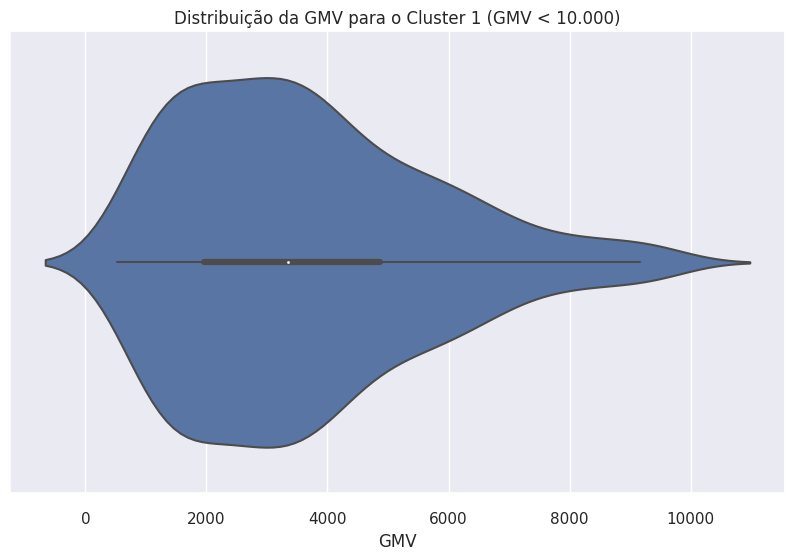

In [136]:
# Filtrar os dados para o cluster 1
df_cluster1 = df10[df10['cluster'] == 1]

# Calcular percentis
q10 = np.percentile(df_cluster1['gross_revenue'], 10)
q25 = np.percentile(df_cluster1['gross_revenue'], 25)
q50 = np.percentile(df_cluster1['gross_revenue'], 50)
q75 = np.percentile(df_cluster1['gross_revenue'], 75)
q90 = np.percentile(df_cluster1['gross_revenue'], 90)

print(f"10º Percentil: {q10}")
print(f"25º Percentil (1º Quartil): {q25}")
print(f"50º Percentil (Mediana): {q50}")
print(f"75º Percentil (3º Quartil): {q75}")
print(f"90º Percentil: {q90}")

# Filtrar os dados
df_aux = df10.loc[(df10['cluster'] == 1) & (df10['gross_revenue'] < 10000), 'gross_revenue']

# Criar o gráfico de violino
plt.figure(figsize=(10, 6))
sns.violinplot(x=df_aux)
plt.title('Distribuição da GMV para o Cluster 1 (GMV < 10.000)')
plt.xlabel('GMV')
plt.show()

## 14.7 Hipóteses de Negócio

## 1. Quem são as pessoas elegíveis para participar do programa Insiders?


In [137]:
df10.loc[df10['cluster'] == 1, 'customer_id'].head()

0    17850
1    13047
2    12583
6    14688
8    15311
Name: customer_id, dtype: Int64

## 2. Quantos clientes farão parte do grupo?

In [138]:
df10.loc[df10['cluster'] == 1, 'customer_id'].size

590

## 3. Quais as principais características desses clientes?
## 9. Quais ações o time de marketing pode realizar para aumentar o faturamento?
* Descrição das features que possui no modelo

In [ ]:
# Calcula o intervalo de confiança
df_insiders = df10.loc[df10['cluster'] == 1, 'gross_revenue']

st.t.interval(alpha=0.95, df=len(df_insiders)-1, loc=np.mean(df_insiders), scale=st.sem(df_insiders)) 

+ Número de Clientes do cluster: 590
+ Faturamento médio: € 7678.95
+ Recência média: 24 dias
+ Média de produtos comprados: 367.54
+ Frequência de Produtos comprados: 0.09 produtos/dia

* **Insiders: Cluster 1**
    1. Indicadores: Alta receita bruta (7678.95), baixa recência (24.04 dias), alta quantidade de produtos (367.54), frequência moderada (0.087) e altos retornos (120.89).
    2. Conclusão: Esse cluster tem clientes que compram frequentemente, gastam muito e retornam bastante, o que caracteriza clientes campeões.
    3. Estratégias para cluster 1 (tratar retornos): 
        + Estratégia 1: Implementar um programa de feedback para entender as razões dos retornos. Enviar pesquisas pós-compra para obter insights sobre problemas de produtos ou serviços.
        + Estratégia 2: Oferecer suporte personalizado e exclusivo, como consultores de produtos ou atendimento prioritário, para reduzir a necessidade de retornos e melhorar a experiência geral.

* **Loyal Customers (Clientes Fiéis): Cluster 3**
    1. Indicadores: Receita bruta moderada (2435.57), recência moderada (42.37 dias), quantidade de produtos moderada (129.97), frequência baixa (0.044) e retornos moderados (15.43).
    2. Conclusão: Esse cluster representa clientes que são regulares em suas compras, mas não tão frequentes quanto os campeões.
    3. Estratégias para o Cluster 2: 
        + Estratégia 1: Implementar um programa de fidelidade que ofereça recompensas progressivas para incentivar compras mais frequentes.
        + Estratégia 2:  Enviar campanhas de marketing personalizadas com base no histórico de compras, oferecendo produtos complementares ou descontos exclusivos.

* **Potential Loyalists (Potenciais Fiéis): Cluster 6**
    1. Indicadores: Receita bruta moderada (2624.06), recência moderada (52.61 dias), quantidade de produtos moderada (97.48), frequência baixa (0.048) e retornos moderados (21.27).
    2. Conclusão: Esses clientes têm o potencial de se tornarem fiéis, mas ainda não compram frequentemente.
    3. Estratégia para o Cluster 3: 
        + Estratégia 1: Oferecer promoções específicas para incentivar mais compras, como descontos em compras futuras após uma compra.
        + Estratégia 2: Criar conteúdos educativos sobre produtos para aumentar o engajamento e a confiança na marca, como webinars ou tutoriais.

* **Recent Customers (Clientes Recentes): Cluster 2**
    1. Indicadores: Receita bruta baixa (970.03), alta recência (74.75 dias), quantidade de produtos baixa (37.43), frequência moderada (0.075) e retornos baixos (6.36).
    2. Conclusão: Esses são clientes que compraram recentemente, mas não frequentemente.
    3. Estratégia para o Cluster 4: 
        + Estratégia 1: Enviar um e-mail de boas-vindas com uma oferta especial para a próxima compra, incentivando a fidelização.
        + Estratégia 2: Criar uma sequência de e-mails automáticos com informações úteis e ofertas para manter o interesse dos clientes após a primeira compra.

* **Promising (Promissores): Cluster 5**
    1. Indicadores: Receita bruta baixa (1253.35), alta recência (60.54 dias), quantidade de produtos baixa (57.29), frequência baixa (0.049) e retornos baixos (7.62).
    2. Conclusão: Esses clientes mostram potencial, mas ainda não compram frequentemente.
    3. Estratégia para o Cluster 5: 
        + Estratégia 1: Oferecer uma promoção "compre mais, ganhe mais" para incentivar compras maiores e mais frequentes.
        + Estratégia 2: Enviar recomendações personalizadas de produtos com base em suas compras anteriores para aumentar a relevância e o engajamento.

* **About to Sleep (Prestes a Dormir): Cluster 7**
    1. Indicadores: Receita bruta baixa (851.93), alta recência (93.13 dias), quantidade de produtos baixa (26.67), frequência moderada (0.162) e retornos moderados (31.39).
    2. Conclusão: Esses clientes costumavam comprar, mas não têm feito isso recentemente.
    3. Estratégia para o Cluster 6: 
        + Estratégia 1: Implementar uma campanha de reativação com descontos especiais ou ofertas exclusivas para trazer esses clientes de volta.
        + Estratégia 2: Enviar lembretes personalizados de produtos que compraram anteriormente e novos lançamentos que podem interessá-los.

* **At Risk (Em Risco): Cluster 4**
    1. Indicadores: Receita bruta muito baixa (533.63), recência moderada (44.72 dias), quantidade de produtos muito baixa (11.53), frequência muito baixa (0.011) e retornos mínimos (0.98).
    2. Conclusão: Esses clientes não compram há um tempo significativo e estão em risco de não voltar.
    3. Estratégia para o Cluster 7: 
        + Estratégia 1: Oferecer promoções exclusivas e urgentes, como descontos limitados, para incentivar uma compra rápida.
        + Estratégia 2: Realizar uma análise de feedback para entender por que esses clientes estão em risco e ajustar estratégias de acordo com os insights obtidos.

* **Hibernating (Hibernando): Cluster 0**
    1. Indicadores: Receita bruta muito baixa (558.83), recência muito alta (130.19 dias), quantidade de produtos muito baixa (14.81), frequência moderada (0.350) e retornos baixos (7.72).
    2. Conclusão: Esses clientes não compram há muito tempo e gastaram pouco.
    3. Estratégia para o Cluster 8: 
        + Estratégia 1: Enviar uma campanha de reativação agressiva com grandes descontos ou um presente gratuito na próxima compra.
        + Estratégia 2: Criar um programa de reengajamento, como um e-mail informativo sobre novidades e melhorias na empresa, para reacender o interesse e a conexão com a marca.

## 4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?
## 8. Qual a garantia que o programa Insiders é melhor que o restante da base?
R: A garantia de que o programa Insiders é melhor que o restante da base é demonstrada pela contribuição significativa dos Insiders ao GMV total, representando 56,83%

In [140]:
df_insiders_gmv = df10.loc[df10['cluster'] == 1, 'gross_revenue'].sum()
df_all_gmv = df10.loc[:, 'gross_revenue'].sum()

print( ' GMV from Insiders: {:.2f}%'.format( 100*df_insiders_gmv / df_all_gmv ) )

 GMV from Insiders: 56.83%


## 5. Qual a expectativa de faturamento desse grupo para os proximos meses?

A noção de tempo ficou clusterizada. A resposta desssa pergunta fica para outro ciclo.

## 6. Quais as condições para uma pessoa ser elegível ao Insiders?
## 7. Quais as condições para uma pessoa ser removida do Insiders?

O modelo que vai dizer. Aí é só marcar no tempo do programa Insiders e Rodar de novo o modelo para ver se ela deve entrar ou ser removida do programa.